# Retailkart.com_Customer_Segmentation

## Problem Statement

Retailkart.com is a small and medium-scale organization that majorly deals in wine, fruit and meat products, having held around 35% market share. The company has been leading the domain offline for a long time.

The critical problem for retailkart.com is to stay competitive. Competing with rapidly expanding companies offering quick and free deliveries while still accepting online purchases at affordable costs is challenging. As a result, the company is losing market share, and customer behaviour patterns are also changing.

For its current consumers, retailkart.com has launched a consumer behaviour study survey through a third-party survey company. According to the survey's findings, retailkart.com recently decided to enter the online market because customers' behaviour is changing. The company now favours online quick delivery for the customers' daily needs.

The company’s near-term objective is to maintain its overall market share, with the increasing competition offering 10-minute delivery, among other benefits. However, it has become critical for the company to retain its existing customers and drive growth on the platform.

Growth on the platform can be driven by increasing conversion rates and purchase frequency for existing offline customers by moving them to the online space and offering a better personalized experience.

More than six months into launching the platform online, the company is trying to develop better ideas to retain existing customers and stop them from opting out.

In [260]:
# Importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding dataset

In [261]:
# Loading CustomerPurchaseDat dataset
df = pd.read_csv('CustomerPurchaseData.csv')
df.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    13/11/12       59         6  ...                  8             0   
1    10/12/13       94         1  ...                  5             0   
2    08/08/12       31         0  ...                  8             0   
3    15/06/14       80         1  ...                  6             0   
4    09/09/12       52         1  ...                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11       0.0  
1              3         11       0.0  
2              3         11       0.0  
3              3         11       0.0  
4              3         11       0.0  

[5 rows x 29 columns]

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [4]:
df.shape

(2239, 29)

In [5]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2239.000000  2239.000000    2238.000000  2239.000000  2239.000000   
mean    9149.564538  1968.802144   51435.772118     0.443502     0.500223   
std    10605.188253    11.985494   22047.706404     0.537513     0.543772   
min        0.000000  1893.000000       0.000000     0.000000     0.000000   
25%     3383.500000  1959.000000   34730.500000     0.000000     0.000000   
50%     6019.000000  1970.000000   51075.000000     0.000000     0.000000   
75%     9043.500000  1977.000000   68279.250000     1.000000     1.000000   
max    47392.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2239.000000  2239.000000  2239.000000      2239.000000   
mean     49.121036   304.067441    26.307727       167.016525   
std      28.963662   336.614830    39.781468       225.743829   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     1.000000        16.000000   
50%      49.000000   174.000000     8.000000        67.000000   
75%      74.000000   504.500000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2239.000000  ...        2239.000000   2239.000000   2239.000000   
mean         37.538633  ...           5.316213      0.072800      0.074587   
std          54.637617  ...           2.427144      0.259867      0.262782   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2239.000000   2239.000000   2239.000000  2239.000000         2239.0   
mean       0.072800      0.064314      0.013399     0.009379            3.0   
std        0.259867      0.245367      0.115001     0.096412            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2239.0  2216.000000  
mean        11.0     0.150271  
std          0.0     0.357417  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

### **Insights:**
- **The dataset contains 2239 rows and 29 columns.**
- **As we can see from df.info() ‘Response’ and 'Income' which have missing values.**


### Exporatory Data Analysis And Feature Engineering

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### MIssing value Treatment

In [262]:
df.isnull().sum().sort_values(ascending=False)

Response               23
Income                  1
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
ID                      0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
MntSnacksProds          0
dtype: int64

In [8]:
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

Response               1.03
Income                 0.04
NumDealsPurchases      0.00
Z_Revenue              0.00
Z_CostContact          0.00
Complain               0.00
AcceptedCmp2           0.00
AcceptedCmp1           0.00
AcceptedCmp5           0.00
AcceptedCmp4           0.00
AcceptedCmp3           0.00
NumWebVisitsMonth      0.00
NumStorePurchases      0.00
NumCatalogPurchases    0.00
NumWebPurchases        0.00
ID                     0.00
Year_Birth             0.00
MntSweetProducts       0.00
MntFishProducts        0.00
MntMeatProducts        0.00
MntFruits              0.00
MntWines               0.00
Recency                0.00
Dt_Customer            0.00
Teenhome               0.00
Kidhome                0.00
Marital_Status         0.00
Education              0.00
MntSnacksProds         0.00
dtype: float64

In [9]:
## imputing income column missing value  with 0 because Income is continous variable
df['Income'].fillna(0,inplace=True)
df['Income'].isnull().sum()

0

In [10]:
### Null value treatment for Response column
df['Response'].value_counts()

0.0    1883
1.0     333
Name: Response, dtype: int64

In [11]:
df['Response'].mode()

0    0.0
Name: Response, dtype: float64

In [12]:
## Here For Response column we Impute missing Values with Mode of Respone column(0 in this case)
df['Response'].fillna(df['Response'].mode()[0],inplace=True)



In [13]:
df['Response'].isnull().sum()

0

In [14]:
df['Response'].value_counts()

0.0    1906
1.0     333
Name: Response, dtype: int64

#### Now will check the DataType of all Cloumns 

In [15]:
df.dtypes


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntSnacksProds           int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response               float64
dtype: object

- **All the DataTypes are shown correct here**
- **And now there is no null Values present in dataset**

In [263]:
## Check for duplicates
sum(df.duplicated(subset='ID'))


1

In [17]:
duplicate=df[df.duplicated(subset='ID')]
duplicate

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1887  11088        1959       PhD          Widow  67786.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
1887    07/12/13        0       431  ...                  1             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1887             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
1887              3         11       1.0  

[1 rows x 29 columns]

In [18]:
df[df['ID']== 11088]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1663  11088        1971       PhD       Together  78642.0        0         1   
1887  11088        1959       PhD          Widow  67786.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
1663    21/04/13       83      1396  ...                  6             0   
1887    07/12/13        0       431  ...                  1             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1663             0             0             0             0         0   
1887             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
1663              3         11       0.0  
1887              3         11       1.0  

[2 rows x 29 columns]

There is a duplicate entry present in dataset now we have to delete one of the row

In [19]:
df.drop_duplicates(subset='ID',inplace=True)

##### Now Duplicate value is dropped lets check the shape Again

In [20]:
df.shape

(2238, 29)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2238 non-null   int64  
 1   Year_Birth           2238 non-null   int64  
 2   Education            2238 non-null   object 
 3   Marital_Status       2238 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2238 non-null   int64  
 6   Teenhome             2238 non-null   int64  
 7   Dt_Customer          2238 non-null   object 
 8   Recency              2238 non-null   int64  
 9   MntWines             2238 non-null   int64  
 10  MntFruits            2238 non-null   int64  
 11  MntMeatProducts      2238 non-null   int64  
 12  MntFishProducts      2238 non-null   int64  
 13  MntSweetProducts     2238 non-null   int64  
 14  MntSnacksProds       2238 non-null   int64  
 15  NumDealsPurchases    2238 non-null   i

In [22]:
## Grouping categorical/object and Numerical columns 
cat_col = df.select_dtypes(include='object')
num_col = df.select_dtypes(exclude ='object')

In [23]:
cat_col

Education Marital_Status Dt_Customer
0        Basic        Married    13/11/12
1        Basic       Together    10/12/13
2        Basic       Divorced    08/08/12
3        Basic        Married    15/06/14
4        Basic       Together    09/09/12
...        ...            ...         ...
2234     Cycle        Married    06/11/12
2235     Cycle       Divorced    13/02/13
2236     Cycle         Single    12/10/12
2237     Cycle       Together    07/05/13
2238     Cycle       Together    12/08/12

[2238 rows x 3 columns]

In [24]:
num_col

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0       387        1976   7500.0        0         0       59         6   
1      8373        1979  24594.0        1         0       94         1   
2      5342        1976   9548.0        1         0       31         0   
3      2563        1961  28249.0        0         0       80         1   
4      9733        1978  24882.0        1         0       52         1   
...     ...         ...      ...      ...       ...      ...       ...   
2234   8722        1957  82347.0        0         0       38       556   
2235    607        1955  41769.0        0         1       31       302   
2236   3661        1995  80617.0        0         0       42       594   
2237  21711        1979   7500.0        1         0        7         2   
2238   8720        1978      0.0        0         0       53        32   

      MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0            16               11               11  ...                  8   
1             3                6               10  ...                  5   
2             1                3               10  ...                  8   
3             9                7                2  ...                  6   
4             4               10               29  ...                  6   
...         ...              ...              ...  ...                ...   
2234         54              845              202  ...                  3   
2235         29              131               32  ...                  8   
2236         51              631               72  ...                  2   
2237          8               11                3  ...                  7   
2238          2             1607               12  ...                  0   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                1             0             0             0             0   
...            ...           ...           ...           ...           ...   
2234             1             0             0             1             0   
2235             0             0             0             0             0   
2236             0             0             0             0             0   
2237             0             0             0             0             0   
2238             0             1             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11       0.0  
1            0              3         11       0.0  
2            0              3         11       0.0  
3            0              3         11       0.0  
4            0              3         11       0.0  
...        ...            ...        ...       ...  
2234         0              3         11       1.0  
2235         0              3         11       0.0  
2236         0              3         11       0.0  
2237         0              3         11       0.0  
2238         0              3         11       0.0  

[2238 rows x 26 columns]

In [25]:
num_col.shape

(2238, 26)

In [26]:
num_col.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2238.000000  2238.000000    2238.000000  2238.000000  2238.000000   
mean    9148.698391  1968.806524   51405.483467     0.443700     0.500447   
std    10607.479181    11.986381   22071.783089     0.537551     0.543791   
min        0.000000  1893.000000       0.000000     0.000000     0.000000   
25%     3382.250000  1959.000000   34710.000000     0.000000     0.000000   
50%     6010.000000  1970.000000   51025.500000     0.000000     0.000000   
75%     9025.250000  1977.000000   68279.250000     1.000000     1.000000   
max    47392.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2238.000000  2238.000000  2238.000000      2238.000000   
mean     49.142985   304.010724    26.282842       166.894102   
std      28.951505   336.679359    39.772925       225.719926   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.750000    33.000000       231.750000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count       2238.00000  ...        2238.000000   2238.000000   2238.000000   
mean          37.51966  ...           5.318141      0.072833      0.074620   
std           54.64245  ...           2.425970      0.259920      0.262836   
min            0.00000  ...           0.000000      0.000000      0.000000   
25%            3.00000  ...           3.000000      0.000000      0.000000   
50%           12.00000  ...           6.000000      0.000000      0.000000   
75%           50.00000  ...           7.000000      0.000000      0.000000   
max          259.00000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2238.000000   2238.000000   2238.000000  2238.000000         2238.0   
mean       0.072833      0.064343      0.013405     0.009383            3.0   
std        0.259920      0.245418      0.115026     0.096434            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2238.0  2238.000000  
mean        11.0     0.148347  
std          0.0     0.355523  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [27]:
cat_col.columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

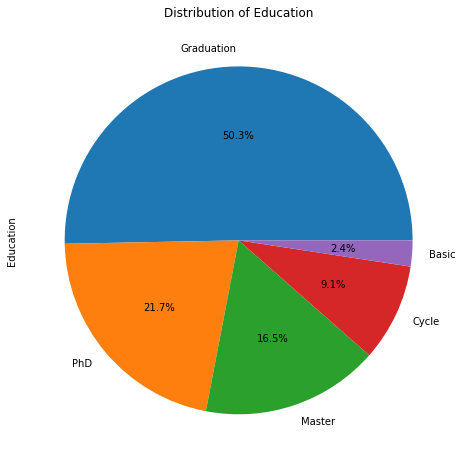

In [28]:
### Now Visualise the distribution of Education columns
cat_col['Education'].value_counts().plot.pie(y='Education',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of Education')
plt.show()

In [29]:
## There only few basic row present in Education column so we merge 'basic' and  'Cycle' rows as Basic or Cycle

df['Education'].loc[df['Education']=='Basic']='Cycle or Basic'
df['Education'].loc[df['Education']=='Cycle']='Cycle or Basic'


In [30]:
df['Education'].value_counts()

Graduation        1126
PhD                485
Master             370
Cycle or Basic     257
Name: Education, dtype: int64

In [31]:
df['Marital_Status'].value_counts()

Married     864
Together    579
Single      480
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

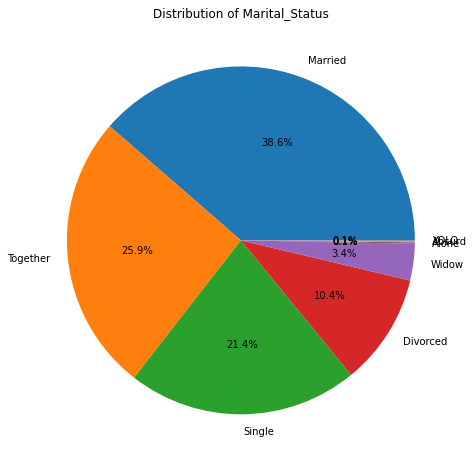

In [32]:
### Now Visualise the distribution of Education columns
cat_col['Marital_Status'].value_counts().plot.pie(y='Marital_Status',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of Marital_Status')
plt.ylabel(' ')
plt.show()

In [33]:
## There only few YOLO,Alone,Absurd row present in Marital_Status  column so we will asign it others

df['Marital_Status'].loc[df['Marital_Status']=='Alone']='Others'
df['Marital_Status'].loc[df['Marital_Status']=='YOLO']='Others'
df['Marital_Status'].loc[df['Marital_Status']=='Absurd']='Others'

In [34]:
df['Marital_Status'].value_counts()

Married     864
Together    579
Single      480
Divorced    232
Widow        76
Others        7
Name: Marital_Status, dtype: int64

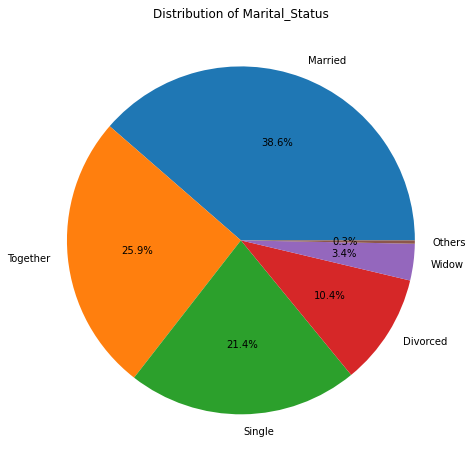

In [35]:
### Now Visualise the distribution of Education columns
df['Marital_Status'].value_counts().plot.pie(y='Marital_Status',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of Marital_Status')
plt.ylabel(' ')
plt.show()

In [36]:
## Married & Together (it may be living_together) but we will consider it as Married 
df['Marital_Status'].loc[df['Marital_Status']=='Married']='Married'
df['Marital_Status'].loc[df['Marital_Status']=='Together']='Married'

In [37]:
## Dt_Customer is date and time column but it is shown as string type will change its data type
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [38]:
cat_col['Dt_Customer']= pd.to_datetime(cat_col['Dt_Customer'])
cat_col.dtypes


Education                 object
Marital_Status            object
Dt_Customer       datetime64[ns]
dtype: object

In [39]:
### Now lets check NUmerical column

num_col.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntSnacksProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

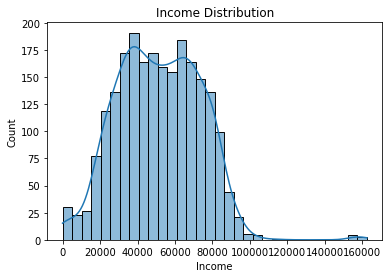

In [40]:
## lets check income columns
sns.histplot(data =num_col['Income'], kde = True)
plt.title("Income Distribution")
plt.show()

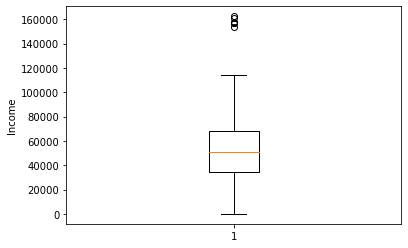

In [41]:
# will check for outliers 
plt.boxplot(num_col['Income'])
plt.ylabel("Income")
plt.show()

In [42]:
## will check and deal with outliers 
np.percentile(df['Income'], [0,50,75,90,95,99,100])

array([     0.  ,  51025.5 ,  68279.25,  79772.7 ,  83894.9 ,  94384.  ,
       162397.  ])

In [43]:
percentile_95 = df['Income'].quantile(0.95)

# Impute outliers with the 99th percentile value
df.loc[df['Income'] > percentile_95, 'Income'] = percentile_95

In [44]:
df["Income"].max()

83894.90000000001

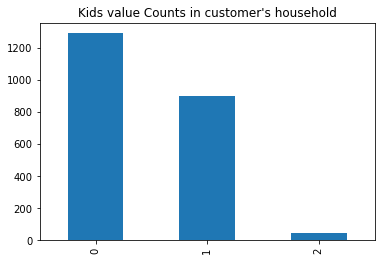

In [45]:
df['Kidhome'].value_counts().plot(kind='bar')
plt.title("Kids value Counts in customer's household")
plt.show()
    

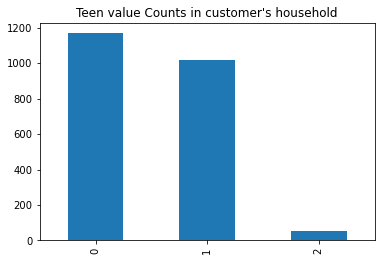

In [46]:
df['Teenhome'].value_counts().plot(kind='bar')
plt.title("Teen value Counts in customer's household")
plt.show()

In [47]:
### We can add these two column and make them as one column "Teen_Kids_home"

df['Teen_Kids_home']= df['Teenhome']+df['Kidhome']
df['Teen_Kids_home'].value_counts()

1    1129
0     642
2     417
3      50
Name: Teen_Kids_home, dtype: int64

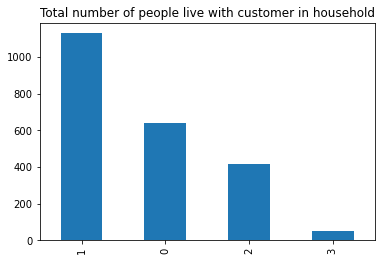

In [48]:
df['Teen_Kids_home'].value_counts().plot(kind='bar')
plt.title("Total number of people live with customer in household")
plt.show()

In [49]:
df.drop(['Teenhome','Kidhome'],axis=1, inplace=True)

In [50]:
df.head()

ID  Year_Birth       Education Marital_Status   Income Dt_Customer  \
0   387        1976  Cycle or Basic        Married   7500.0  2012-11-13   
1  8373        1979  Cycle or Basic        Married  24594.0  2013-10-12   
2  5342        1976  Cycle or Basic       Divorced   9548.0  2012-08-08   
3  2563        1961  Cycle or Basic        Married  28249.0  2014-06-15   
4  9733        1978  Cycle or Basic        Married  24882.0  2012-09-09   

   Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  \
0       59         6         16               11  ...             0   
1       94         1          3                6  ...             0   
2       31         0          1                3  ...             0   
3       80         1          9                7  ...             0   
4       52         1          4               10  ...             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Teen_Kids_home  
0              3         11       0.0               0  
1              3         11       0.0               1  
2              3         11       0.0               1  
3              3         11       0.0               0  
4              3         11       0.0               1  

[5 rows x 28 columns]

In [51]:
df.head()

ID  Year_Birth       Education Marital_Status   Income Dt_Customer  \
0   387        1976  Cycle or Basic        Married   7500.0  2012-11-13   
1  8373        1979  Cycle or Basic        Married  24594.0  2013-10-12   
2  5342        1976  Cycle or Basic       Divorced   9548.0  2012-08-08   
3  2563        1961  Cycle or Basic        Married  28249.0  2014-06-15   
4  9733        1978  Cycle or Basic        Married  24882.0  2012-09-09   

   Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  \
0       59         6         16               11  ...             0   
1       94         1          3                6  ...             0   
2       31         0          1                3  ...             0   
3       80         1          9                7  ...             0   
4       52         1          4               10  ...             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Teen_Kids_home  
0              3         11       0.0               0  
1              3         11       0.0               1  
2              3         11       0.0               1  
3              3         11       0.0               0  
4              3         11       0.0               1  

[5 rows x 28 columns]

In [52]:
# here we dont want date of customer enrollment will extract month and year for better understanding
df['year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year
df['month_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).month

df.drop('Dt_Customer',axis=1, inplace=True)

In [53]:
df.head()

ID  Year_Birth       Education Marital_Status   Income  Recency  \
0   387        1976  Cycle or Basic        Married   7500.0       59   
1  8373        1979  Cycle or Basic        Married  24594.0       94   
2  5342        1976  Cycle or Basic       Divorced   9548.0       31   
3  2563        1961  Cycle or Basic        Married  28249.0       80   
4  9733        1978  Cycle or Basic        Married  24882.0       52   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp5  \
0         6         16               11               11  ...             0   
1         1          3                6               10  ...             0   
2         0          1                3               10  ...             0   
3         1          9                7                2  ...             0   
4         1          4               10               29  ...             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11       0.0   
1             0             0         0              3         11       0.0   
2             0             0         0              3         11       0.0   
3             0             0         0              3         11       0.0   
4             0             0         0              3         11       0.0   

   Teen_Kids_home  year_Customer  month_Customer  
0               0           2012              11  
1               1           2013              10  
2               1           2012               8  
3               0           2014               6  
4               1           2012               9  

[5 rows x 29 columns]

In [54]:
df.head()

ID  Year_Birth       Education Marital_Status   Income  Recency  \
0   387        1976  Cycle or Basic        Married   7500.0       59   
1  8373        1979  Cycle or Basic        Married  24594.0       94   
2  5342        1976  Cycle or Basic       Divorced   9548.0       31   
3  2563        1961  Cycle or Basic        Married  28249.0       80   
4  9733        1978  Cycle or Basic        Married  24882.0       52   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp5  \
0         6         16               11               11  ...             0   
1         1          3                6               10  ...             0   
2         0          1                3               10  ...             0   
3         1          9                7                2  ...             0   
4         1          4               10               29  ...             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11       0.0   
1             0             0         0              3         11       0.0   
2             0             0         0              3         11       0.0   
3             0             0         0              3         11       0.0   
4             0             0         0              3         11       0.0   

   Teen_Kids_home  year_Customer  month_Customer  
0               0           2012              11  
1               1           2013              10  
2               1           2012               8  
3               0           2014               6  
4               1           2012               9  

[5 rows x 29 columns]

In [55]:
num_col.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntSnacksProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

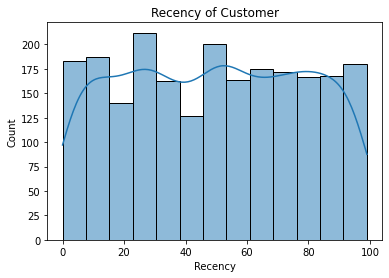

In [56]:
## Now lets check Recency
sns.histplot(data =num_col['Recency'], kde = True)
plt.title('Recency of Customer')
plt.show()

In [57]:
print(df['Recency'].min())
print(df['Recency'].max())

0
99


In [58]:
## will make bins for this column
bins = [0, 30, 60, 100]
labels = [1,2,3]
df['Recency_binned'] = pd.cut(df['Recency'], bins=bins, labels=labels,include_lowest=True)

In [59]:
df.drop('Recency',axis=1,inplace=True)
df.head()

ID  Year_Birth       Education Marital_Status   Income  MntWines  \
0   387        1976  Cycle or Basic        Married   7500.0         6   
1  8373        1979  Cycle or Basic        Married  24594.0         1   
2  5342        1976  Cycle or Basic       Divorced   9548.0         0   
3  2563        1961  Cycle or Basic        Married  28249.0         1   
4  9733        1978  Cycle or Basic        Married  24882.0         1   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         16               11               11                 1  ...   
1          3                6               10                 0  ...   
2          1                3               10                 6  ...   
3          9                7                2                14  ...   
4          4               10               29                 0  ...   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11       0.0   
1             0             0         0              3         11       0.0   
2             0             0         0              3         11       0.0   
3             0             0         0              3         11       0.0   
4             0             0         0              3         11       0.0   

   Teen_Kids_home  year_Customer  month_Customer  Recency_binned  
0               0           2012              11               2  
1               1           2013              10               3  
2               1           2012               8               2  
3               0           2014               6               3  
4               1           2012               9               2  

[5 rows x 29 columns]

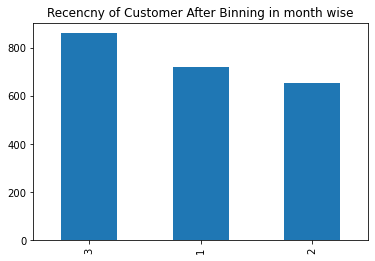

In [60]:
df['Recency_binned'].value_counts().plot(kind='bar')
plt.title('Recencny of Customer After Binning in month wise')
plt.show()

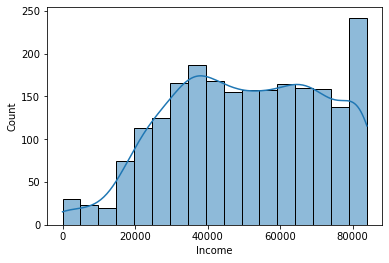

In [61]:
## Now lets check Income
sns.histplot(data =df['Income'], kde = True)
plt.show()

**Insights:-**
- **There is only 1 person in customer's Household in most of customers house**
- **Most of the customers are not coming from 3 or more months**
- **Average salaries of customer is around 50k**


In [62]:
num_col.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntSnacksProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

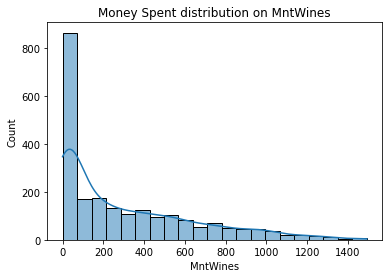

In [63]:
## Now lets check 'MntWines'
sns.histplot(data =df['MntWines'], kde = True)
plt.title("Money Spent distribution on MntWines")
plt.show()

In [64]:
## will check and deal with outliers 
np.percentile(df['MntWines'], [0,50,75,90,95,99,100])

array([   0.  ,  173.5 ,  504.75,  822.3 , 1000.  , 1285.  , 1493.  ])

In [65]:
df['MntWines'].mean()

304.0107238605898

In [66]:
df['MntWines'].median()

173.5

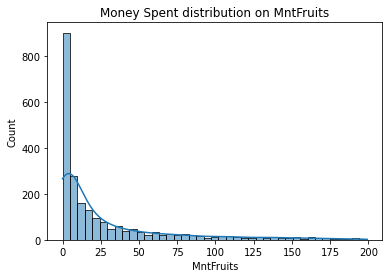

In [67]:
## Now lets check 'MntFruits'
sns.histplot(data =df['MntFruits'], kde = True)
plt.title("Money Spent distribution on MntFruits")
plt.show()

In [68]:
## will check and deal with outliers 
np.percentile(df['MntFruits'], [0,50,75,90,95,99,100])

array([  0.,   8.,  33.,  83., 123., 172., 199.])

In [69]:
df['MntFruits'].mean()

26.2828418230563

**Insights:-**
- **There is only 1 person in customer's Household in most of customers house**
- **Most of the customers are not coming from 3 or more months**
- **Average salaries of customer is around 50k**
- **Average money spent on Wine is 304**
- **Average money spent on fruits is 26**

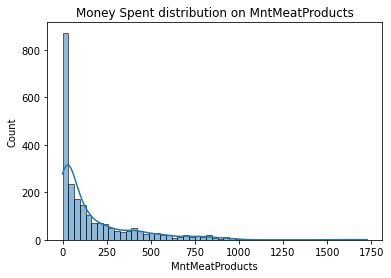

In [70]:
## Now lets check 'MntMeatProducts'
sns.histplot(data =df['MntMeatProducts'], kde = True)
plt.title("Money Spent distribution on MntMeatProducts")
plt.show()

In [71]:
df['MntMeatProducts'].mean()

166.8941018766756

In [72]:
df['MntMeatProducts'].max()

1725

In [73]:
num_col.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntSnacksProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

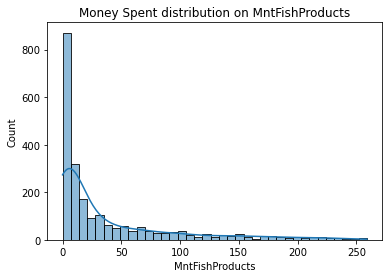

In [74]:
## Now lets check 'MntFishProducts'
sns.histplot(data =df['MntFishProducts'], kde = True)
plt.title("Money Spent distribution on MntFishProducts")
plt.show()

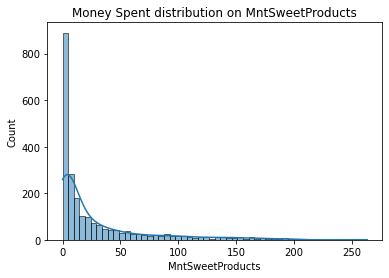

In [75]:
## Now lets check 'MntSweetProducts'
sns.histplot(data =df['MntSweetProducts'], kde = True)
plt.title("Money Spent distribution on MntSweetProducts")
plt.show()

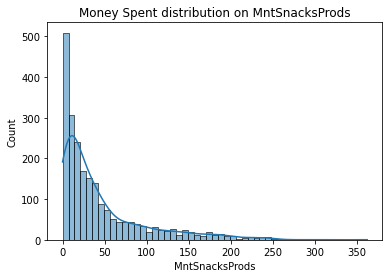

In [76]:
## Now lets check 'MntSnacksProds'
sns.histplot(data =df['MntSnacksProds'], kde = True)
plt.title("Money Spent distribution on MntSnacksProds")
plt.show()

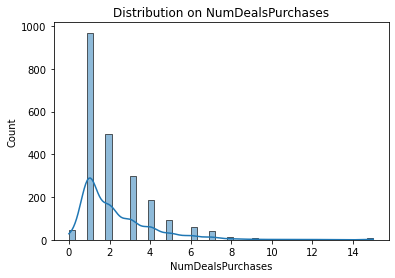

In [77]:
## Now lets check 'NumDealsPurchases'
sns.histplot(data =df['NumDealsPurchases'], kde = True)
plt.title("Distribution on NumDealsPurchases")
plt.show()


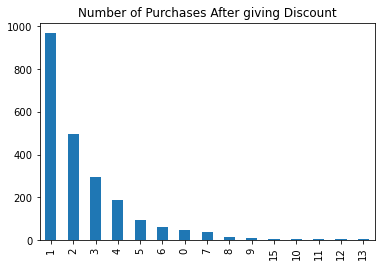

In [78]:
df['NumDealsPurchases'].value_counts().plot(kind='bar')
plt.title('Number of Purchases After giving Discount')
plt.show()

**Insights:-**
- **There is only 1 person in customer's Household in most of customers house**
- **Most of the customers are not coming from 3 or more months**
- **Average salaries of customer is around 50k**
- **Average money spent on Wine is 304**
- **Average money spent on fruits is 26**
- **Number of purchases Even after Giving Discount is largely 1**

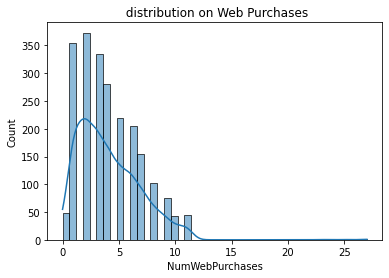

In [79]:
## Now lets check 'NumWebPurchases'
sns.histplot(data =df['NumWebPurchases'], kde = True)
plt.title(" distribution on Web Purchases")
plt.show()


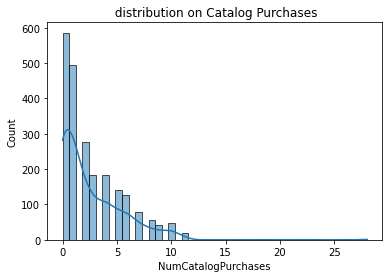

In [80]:
## Now lets check 'NumCatalogPurchases'
sns.histplot(data =df['NumCatalogPurchases'], kde = True)
plt.title(" distribution on Catalog Purchases")
plt.show()

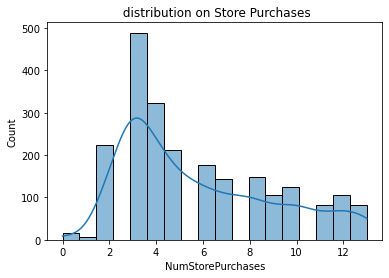

In [81]:
## Now lets check 'NumStorePurchases'
sns.histplot(data =df['NumStorePurchases'], kde = True)
plt.title(" distribution on Store Purchases")
plt.show()

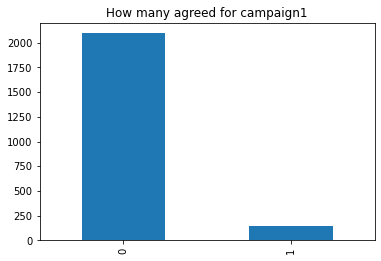

In [82]:
## Now lets look at AcceptedCmps  columns 
df['AcceptedCmp1'].value_counts().plot(kind='bar')
plt.title('How many agreed for campaign1')
plt.show()

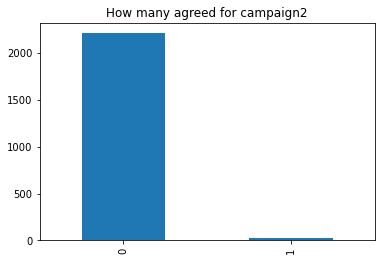

In [83]:
df['AcceptedCmp2'].value_counts().plot(kind='bar')
plt.title('How many agreed for campaign2')
plt.show()

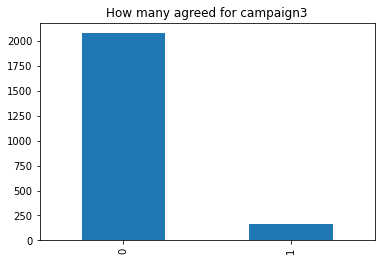

In [84]:
df['AcceptedCmp3'].value_counts().plot(kind='bar')
plt.title('How many agreed for campaign3')
plt.show()

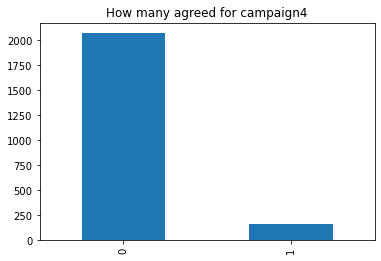

In [85]:
df['AcceptedCmp4'].value_counts().plot(kind='bar')
plt.title('How many agreed for campaign4')
plt.show()

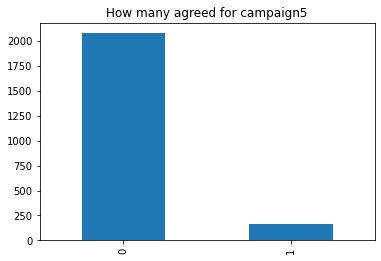

In [86]:
df['AcceptedCmp5'].value_counts().plot(kind='bar')
plt.title('How many agreed for campaign5')
plt.show()

**Insights:-**
- **There is only 1 person in customer's Household in most of customers house**
- **Most of the customers are not coming from 3 or more months**
- **Average salaries of customer is around 50k**
- **Average money spent on Wine is 304**
- **Average money spent on fruits is 26**
- **Number of purchases Even after Giving Discount is largely 1**
- **All campaign Didnot give Good Results Almost all the campaign were rejected by the customers**

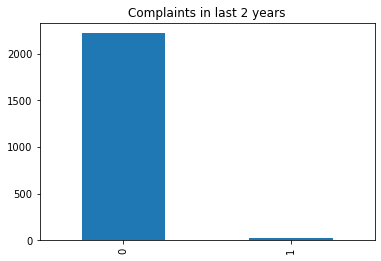

In [87]:
##Now lets inspect Complaints Column
df['Complain'].value_counts().plot(kind='bar')
plt.title('Complaints in last 2 years')
plt.show()

In [88]:
df['Complain'].value_counts()

0    2217
1      21
Name: Complain, dtype: int64

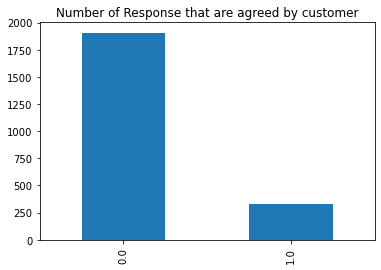

In [89]:
##Now lets inspect Response Column
df['Response'].value_counts().plot(kind='bar')
plt.title('Number of Response that are agreed by customer')
plt.show()

In [90]:
df['Response'].value_counts()

0.0    1906
1.0     332
Name: Response, dtype: int64

In [91]:
df['Z_CostContact'].value_counts()

3    2238
Name: Z_CostContact, dtype: int64

In [92]:
df['Z_Revenue'].value_counts()

11    2238
Name: Z_Revenue, dtype: int64

**Insights:-**
- **There only 21 custmers who give complaints in last 2 years**
- **Last campaign was accepted by 332 customers**
- **Z_Revenue and Z_CostContact column have only 1 value so will drop these 2 column**

In [93]:
# dropping Z_Revenue and Z_CostContact columns 
df.drop(['Z_Revenue','Z_CostContact'],axis=1, inplace=True)

In [94]:
df.shape

(2238, 27)

** We can derive new feature from money_spent_each product as Total_Spent**

In [95]:
num_col.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntSnacksProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [96]:
df['Total_Money_Spent']= df['MntWines']+ df['MntFruits']+df['MntMeatProducts']+df['MntSnacksProds']+df['MntFishProducts']+df['MntSweetProducts']

In [97]:
df.head()

ID  Year_Birth       Education Marital_Status   Income  MntWines  \
0   387        1976  Cycle or Basic        Married   7500.0         6   
1  8373        1979  Cycle or Basic        Married  24594.0         1   
2  5342        1976  Cycle or Basic       Divorced   9548.0         0   
3  2563        1961  Cycle or Basic        Married  28249.0         1   
4  9733        1978  Cycle or Basic        Married  24882.0         1   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         16               11               11                 1  ...   
1          3                6               10                 0  ...   
2          1                3               10                 6  ...   
3          9                7                2                14  ...   
4          4               10               29                 0  ...   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0         0       0.0   
1             0             0             0         0       0.0   
2             0             0             0         0       0.0   
3             0             0             0         0       0.0   
4             0             0             0         0       0.0   

   Teen_Kids_home  year_Customer  month_Customer  Recency_binned  \
0               0           2012              11               2   
1               1           2013              10               3   
2               1           2012               8               2   
3               0           2014               6               3   
4               1           2012               9               2   

   Total_Money_Spent  
0                 61  
1                 29  
2                 29  
3                 43  
4                 80  

[5 rows x 28 columns]

In [98]:
df[['Total_Money_Spent','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntSnacksProds']].head()

Total_Money_Spent  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0                 61         6         16               11               11   
1                 29         1          3                6               10   
2                 29         0          1                3               10   
3                 43         1          9                7                2   
4                 80         1          4               10               29   

   MntSweetProducts  MntSnacksProds  
0                 1              16  
1                 0               9  
2                 6               9  
3                14              10  
4                 0              36

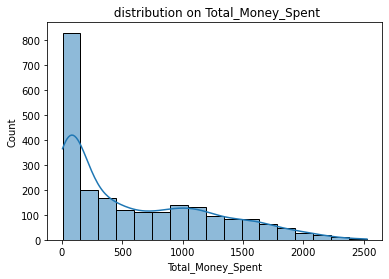

In [99]:
## Now lets check 'Total_Money_Spent'
sns.histplot(data =df['Total_Money_Spent'], kde = True)
plt.title(" distribution on Total_Money_Spent")
plt.show()

In [100]:
df['Total_Money_Spent'].median()

396.0

**Insights:-**
- **Almost 50% of customer spent less than 396 for this retailkart**


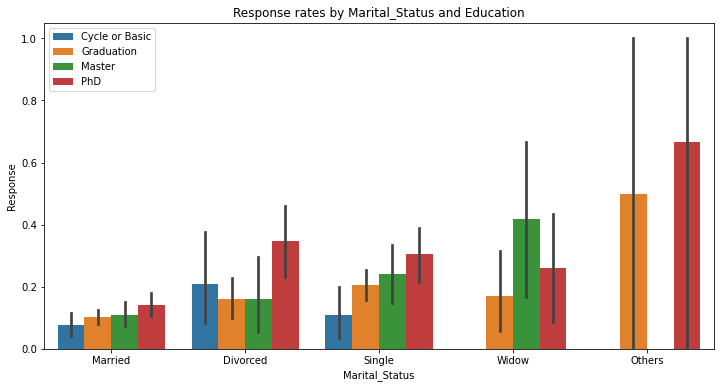

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.Marital_Status,y=df.Response,hue=df.Education)
plt.title("Response rates by Marital_Status and Education")
plt.legend(loc="best")
plt.show()

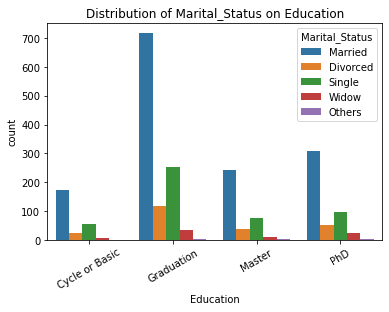

In [102]:
sns.countplot(x=df.Education,hue=df.Marital_Status)
plt.xticks(rotation=30)
plt.title("Distribution of Marital_Status on Education")
plt.show()

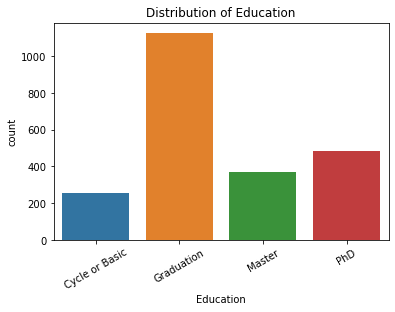

In [103]:
sns.countplot(x=df.Education)
plt.xticks(rotation=30)
plt.title("Distribution of Education")
plt.show()

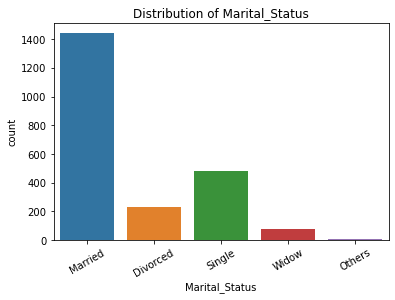

In [104]:
sns.countplot(df.Marital_Status)
plt.xticks(rotation=30)
plt.title("Distribution of Marital_Status")
plt.show()

No handles with labels found to put in legend.


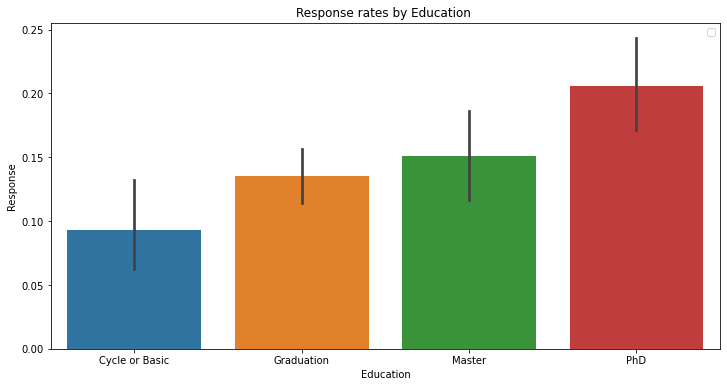

In [105]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.Education,y=df.Response)
plt.title("Response rates by Education ")
plt.legend(loc="best")
plt.show()

No handles with labels found to put in legend.


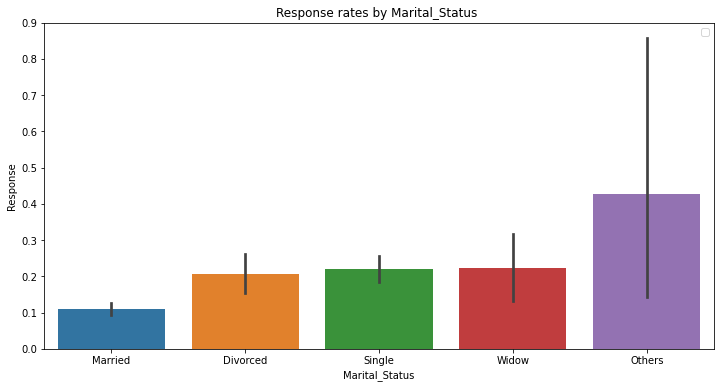

In [106]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.Marital_Status,y=df.Response)
plt.title("Response rates by Marital_Status ")
plt.legend(loc="best")
plt.show()

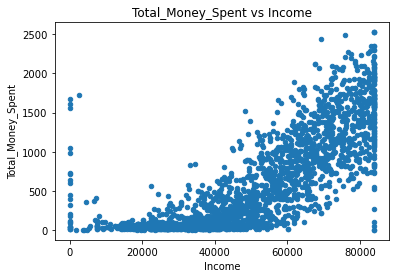

In [107]:
# lets now draw a scatter plot between Total_Money_Spent and Income
df[['Income', 'Total_Money_Spent']].plot.scatter(x = 'Income', y='Total_Money_Spent')
plt.title('Total_Money_Spent vs Income')
plt.show()


In [108]:
df['Total_Money_Spent'].max()

2525

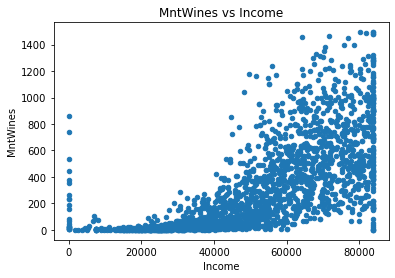

In [109]:
# lets now draw a scatter plot between  MntWines and Income
df[['Income', 'MntWines']].plot.scatter(x = 'Income', y='MntWines')
plt.title('MntWines vs Income')
plt.show()

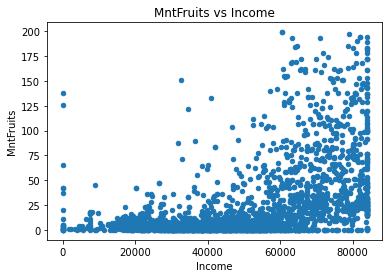

In [110]:
##lets now draw a scatter plot between  MntFruits and Income
df[['Income', 'MntFruits']].plot.scatter(x = 'Income', y='MntFruits')
plt.title('MntFruits vs Income')
plt.show()

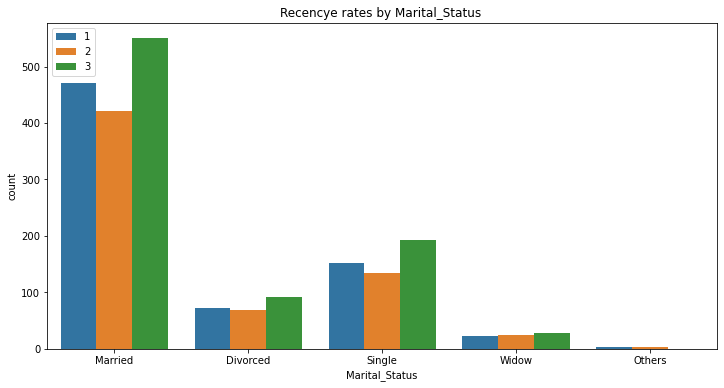

In [111]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.Marital_Status,hue=df.Recency_binned)
plt.title("Recencye rates by Marital_Status ")
plt.legend(loc="best")
plt.show()

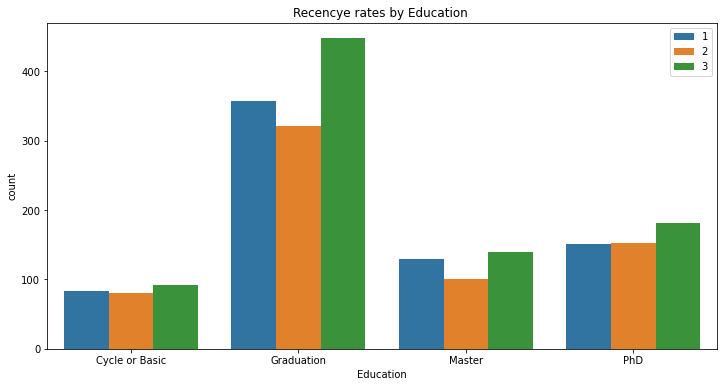

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.Education,hue=df.Recency_binned)
plt.title("Recencye rates by Education ")
plt.legend(loc="best")
plt.show()

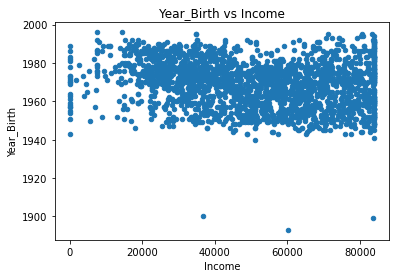

In [113]:
# lets now draw a scatter plot between  Year_Birth and Income
df[['Income', 'Year_Birth']].plot.scatter(x = 'Income', y='Year_Birth')
plt.title('Year_Birth vs Income')
plt.show()

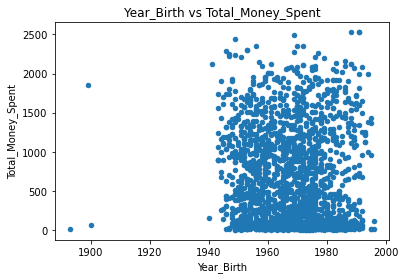

In [114]:
# lets now draw a scatter plot between  Year_Birth and Total_Money_Spent
df[['Year_Birth', 'Total_Money_Spent']].plot.scatter(x = 'Year_Birth', y='Total_Money_Spent')
plt.title('Year_Birth vs Total_Money_Spent')
plt.show()

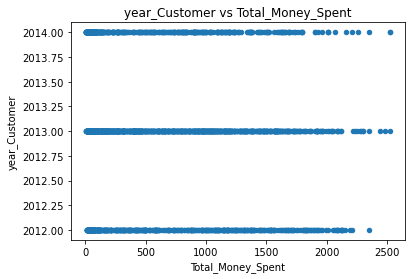

In [115]:
# lets now draw a scatter plot between  year_Customer and Total_Money_Spent
df[['year_Customer', 'Total_Money_Spent']].plot.scatter(x = 'Total_Money_Spent', y='year_Customer')
plt.title('year_Customer vs Total_Money_Spent')
plt.show()

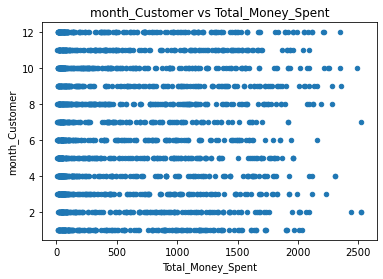

In [116]:
# lets now draw a scatter plot between  month_Customer and Total_Money_Spent
df[['month_Customer', 'Total_Money_Spent']].plot.scatter(x = 'Total_Money_Spent', y='month_Customer')
plt.title('month_Customer vs Total_Money_Spent')
plt.show()

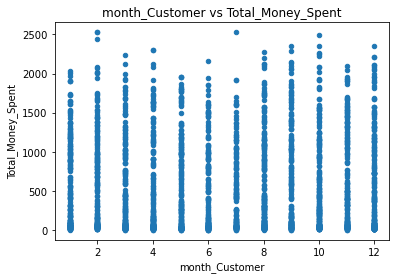

In [117]:
# lets now draw a scatter plot between  month_Customer and Total_Money_Spent
df[['month_Customer', 'Total_Money_Spent']].plot.scatter(x = 'month_Customer', y='Total_Money_Spent')
plt.title('month_Customer vs Total_Money_Spent')
plt.show()

In [118]:
num_cols = df.columns[df.dtypes != 'object']
num_cols

Index(['ID', 'Year_Birth', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Teen_Kids_home',
       'year_Customer', 'month_Customer', 'Recency_binned',
       'Total_Money_Spent'],
      dtype='object')

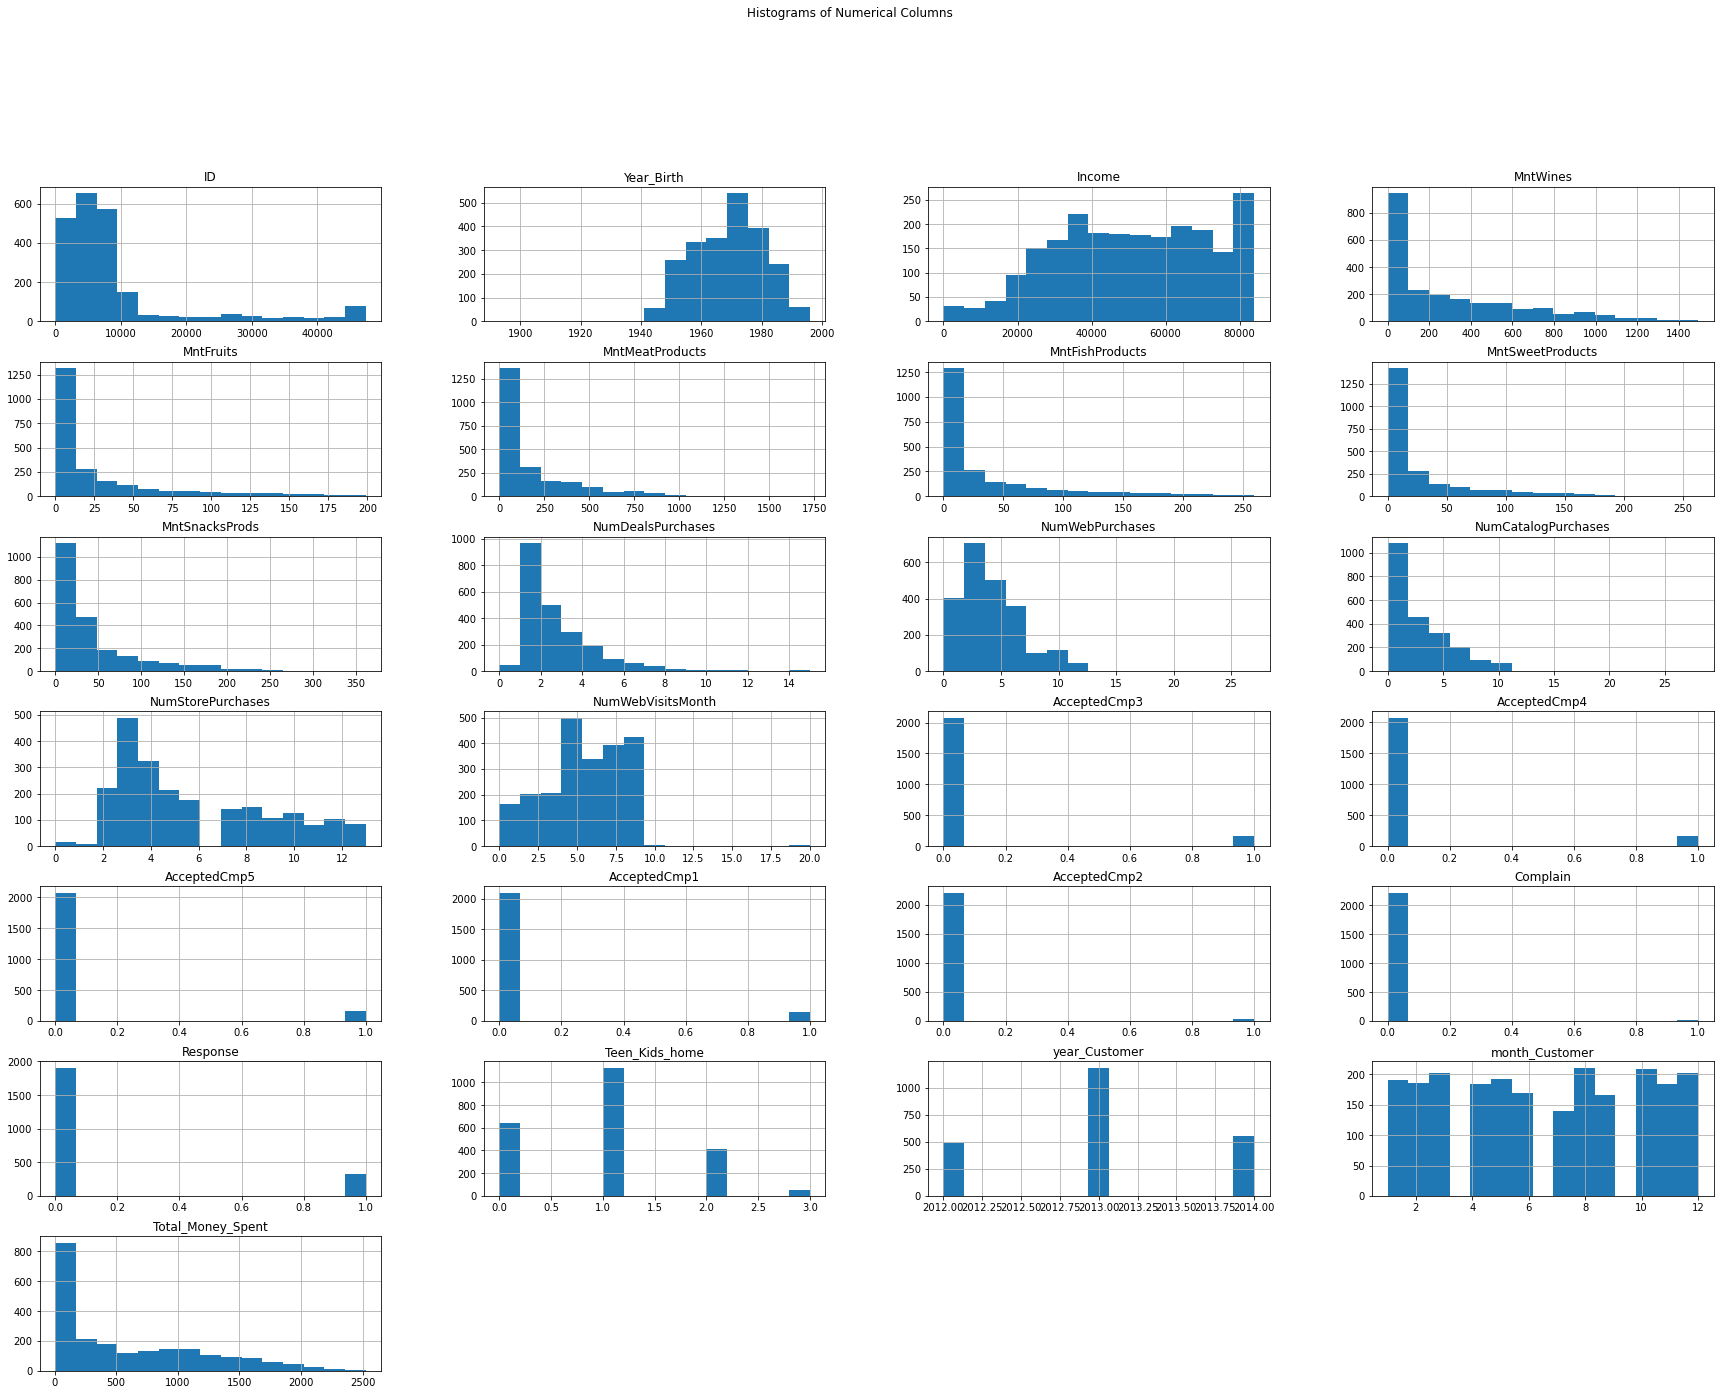

In [119]:
df[num_cols].hist(bins=15, figsize=(30, 25), layout=(8, 4))
plt.xlabel('Value')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [120]:
df[num_cols].corr()

ID  Year_Birth    Income  MntWines  MntFruits  \
ID                   1.000000    0.030921  0.022603 -0.008406   0.021021   
Year_Birth           0.030921    1.000000 -0.203909 -0.157439  -0.017323   
Income               0.022603   -0.203909  1.000000  0.704975   0.516257   
MntWines            -0.008406   -0.157439  0.704975  1.000000   0.389538   
MntFruits            0.021021   -0.017323  0.516257  0.389538   1.000000   
MntMeatProducts      0.029713   -0.030248  0.655863  0.562558   0.542735   
MntFishProducts      0.013628   -0.041195  0.531926  0.399571   0.594635   
MntSweetProducts    -0.008235   -0.018009  0.517325  0.386478   0.567499   
MntSnacksProds       0.024464   -0.061262  0.394638  0.387306   0.392537   
NumDealsPurchases   -0.018241   -0.061393 -0.112202  0.011400  -0.131662   
NumWebPurchases     -0.000350   -0.145110  0.466877  0.542325   0.297082   
NumCatalogPurchases  0.028784   -0.120758  0.671774  0.635171   0.487526   
NumStorePurchases   -0.009100   -0.128040  0.661520  0.641990   0.461888   
NumWebVisitsMonth   -0.018844    0.120521 -0.623259 -0.320540  -0.417726   
AcceptedCmp3        -0.010497    0.061775 -0.005927  0.062154   0.014871   
AcceptedCmp4        -0.033530   -0.060544  0.206531  0.373312   0.010296   
AcceptedCmp5         0.033198    0.007108  0.381337  0.472663   0.216076   
AcceptedCmp1         0.003924   -0.005948  0.311878  0.354158   0.194972   
AcceptedCmp2         0.001577   -0.006548  0.104161  0.205924  -0.009721   
Complain             0.007803   -0.030141 -0.026430 -0.039037  -0.005121   
Response            -0.018710    0.025096  0.165349  0.246519   0.120958   
Teen_Kids_home      -0.021239   -0.089542 -0.321301 -0.348838  -0.392982   
year_Customer       -0.026976   -0.028198  0.024159 -0.154229  -0.055156   
month_Customer       0.017366    0.005329  0.009055  0.039140   0.001227   
Total_Money_Spent    0.010616   -0.110766  0.791874  0.891841   0.614041   

                     MntMeatProducts  MntFishProducts  MntSweetProducts  \
ID                          0.029713         0.013628         -0.008235   
Year_Birth                 -0.030248        -0.041195         -0.018009   
Income                      0.655863         0.531926          0.517325   
MntWines                    0.562558         0.399571          0.386478   
MntFruits                   0.542735         0.594635          0.567499   
MntMeatProducts             1.000000         0.568177          0.524027   
MntFishProducts             0.568177         1.000000          0.579949   
MntSweetProducts            0.524027         0.579949          1.000000   
MntSnacksProds              0.350100         0.422577          0.369805   
NumDealsPurchases          -0.121873        -0.138979         -0.119952   
NumWebPurchases             0.294004         0.293801          0.348461   
NumCatalogPurchases         0.723611         0.534246          0.491076   
NumStorePurchases           0.479655         0.459793          0.448636   
NumWebVisitsMonth          -0.539043        -0.445729         -0.423698   
AcceptedCmp3                0.018350         0.000387          0.001430   
AcceptedCmp4                0.103030         0.016877          0.028543   
AcceptedCmp5                0.374011         0.199654          0.259524   
AcceptedCmp1                0.309967         0.260850          0.241754   
AcceptedCmp2                0.043081         0.002590          0.009944   
Complain                   -0.023469        -0.020947         -0.022522   
Response                    0.233818         0.107795          0.114737   
Teen_Kids_home             -0.500010        -0.424367         -0.386422   
year_Customer              -0.082497        -0.067620         -0.073388   
month_Customer              0.035214        -0.009499          0.003883   
Total_Money_Spent           0.842873         0.642648          0.603111   

                     MntSnacksProds  NumDealsPurchases  ...  AcceptedCmp4  \
ID                    

In [121]:
N_C=num_cols.drop('ID')

In [122]:
df[N_C].corr()

Year_Birth    Income  MntWines  MntFruits  \
Year_Birth             1.000000 -0.203909 -0.157439  -0.017323   
Income                -0.203909  1.000000  0.704975   0.516257   
MntWines              -0.157439  0.704975  1.000000   0.389538   
MntFruits             -0.017323  0.516257  0.389538   1.000000   
MntMeatProducts       -0.030248  0.655863  0.562558   0.542735   
MntFishProducts       -0.041195  0.531926  0.399571   0.594635   
MntSweetProducts      -0.018009  0.517325  0.386478   0.567499   
MntSnacksProds        -0.061262  0.394638  0.387306   0.392537   
NumDealsPurchases     -0.061393 -0.112202  0.011400  -0.131662   
NumWebPurchases       -0.145110  0.466877  0.542325   0.297082   
NumCatalogPurchases   -0.120758  0.671774  0.635171   0.487526   
NumStorePurchases     -0.128040  0.661520  0.641990   0.461888   
NumWebVisitsMonth      0.120521 -0.623259 -0.320540  -0.417726   
AcceptedCmp3           0.061775 -0.005927  0.062154   0.014871   
AcceptedCmp4          -0.060544  0.206531  0.373312   0.010296   
AcceptedCmp5           0.007108  0.381337  0.472663   0.216076   
AcceptedCmp1          -0.005948  0.311878  0.354158   0.194972   
AcceptedCmp2          -0.006548  0.104161  0.205924  -0.009721   
Complain              -0.030141 -0.026430 -0.039037  -0.005121   
Response               0.025096  0.165349  0.246519   0.120958   
Teen_Kids_home        -0.089542 -0.321301 -0.348838  -0.392982   
year_Customer         -0.028198  0.024159 -0.154229  -0.055156   
month_Customer         0.005329  0.009055  0.039140   0.001227   
Total_Money_Spent     -0.110766  0.791874  0.891841   0.614041   

                     MntMeatProducts  MntFishProducts  MntSweetProducts  \
Year_Birth                 -0.030248        -0.041195         -0.018009   
Income                      0.655863         0.531926          0.517325   
MntWines                    0.562558         0.399571          0.386478   
MntFruits                   0.542735         0.594635          0.567499   
MntMeatProducts             1.000000         0.568177          0.524027   
MntFishProducts             0.568177         1.000000          0.579949   
MntSweetProducts            0.524027         0.579949          1.000000   
MntSnacksProds              0.350100         0.422577          0.369805   
NumDealsPurchases          -0.121873        -0.138979         -0.119952   
NumWebPurchases             0.294004         0.293801          0.348461   
NumCatalogPurchases         0.723611         0.534246          0.491076   
NumStorePurchases           0.479655         0.459793          0.448636   
NumWebVisitsMonth          -0.539043        -0.445729         -0.423698   
AcceptedCmp3                0.018350         0.000387          0.001430   
AcceptedCmp4                0.103030         0.016877          0.028543   
AcceptedCmp5                0.374011         0.199654          0.259524   
AcceptedCmp1                0.309967         0.260850          0.241754   
AcceptedCmp2                0.043081         0.002590          0.009944   
Complain                   -0.023469        -0.020947         -0.022522   
Response                    0.233818         0.107795          0.114737   
Teen_Kids_home             -0.500010        -0.424367         -0.386422   
year_Customer              -0.082497        -0.067620         -0.073388   
month_Customer              0.035214        -0.009499          0.003883   
Total_Money_Spent           0.842873         0.642648          0.603111   

                     MntSnacksProds  NumDealsPurchases  NumWebPurchases  ...  \
Year_Birth                -0.061262          -0.061393        -0.145110  ...   
Income                     0.394638          -0.112202         0.466877  ...   
MntWines                   0.387306           0.011400         0.542325  ...   
MntFruits                  0.392537          -0.131662         0.297082  ...   
MntMeatProducts            0.350100          -0.121873         0.294004  ...   
MntFishProduct

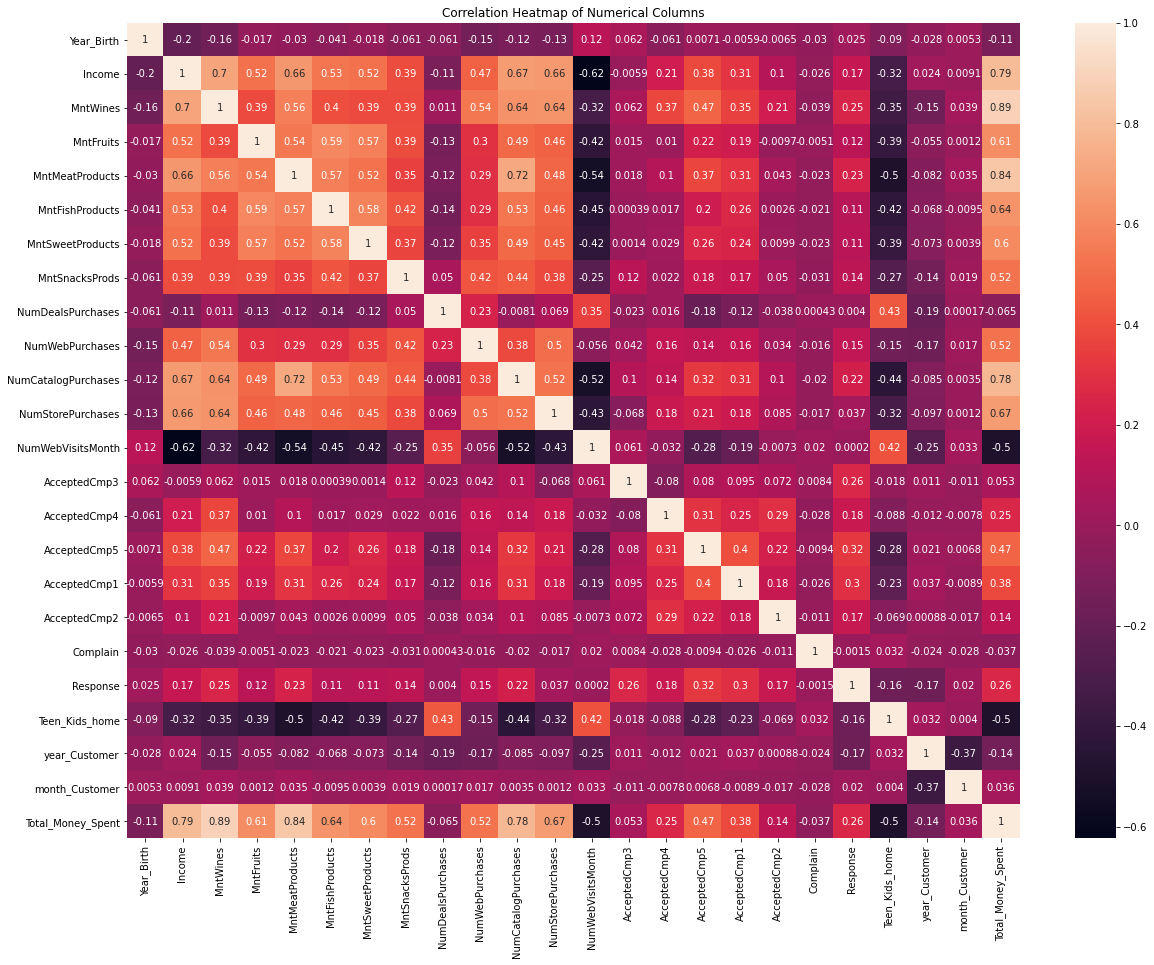

In [123]:
# Create a heatmap of the correlation matrix for numerical columns
plt.figure(figsize=(20, 15))
plt.title('Correlation Heatmap of Numerical Columns')
sns.heatmap(df[N_C].corr(),annot = True)
plt.show()

In [124]:
# dropping  columns with high corelation 
df.drop(['MntFruits','MntMeatProducts','MntFishProducts','MntWines','MntSweetProducts',"MntSnacksProds",],axis=1, inplace=True)

In [125]:
num_cols = df.columns[df.dtypes != 'object']
num_cols

Index(['ID', 'Year_Birth', 'Income', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Teen_Kids_home',
       'year_Customer', 'month_Customer', 'Recency_binned',
       'Total_Money_Spent'],
      dtype='object')

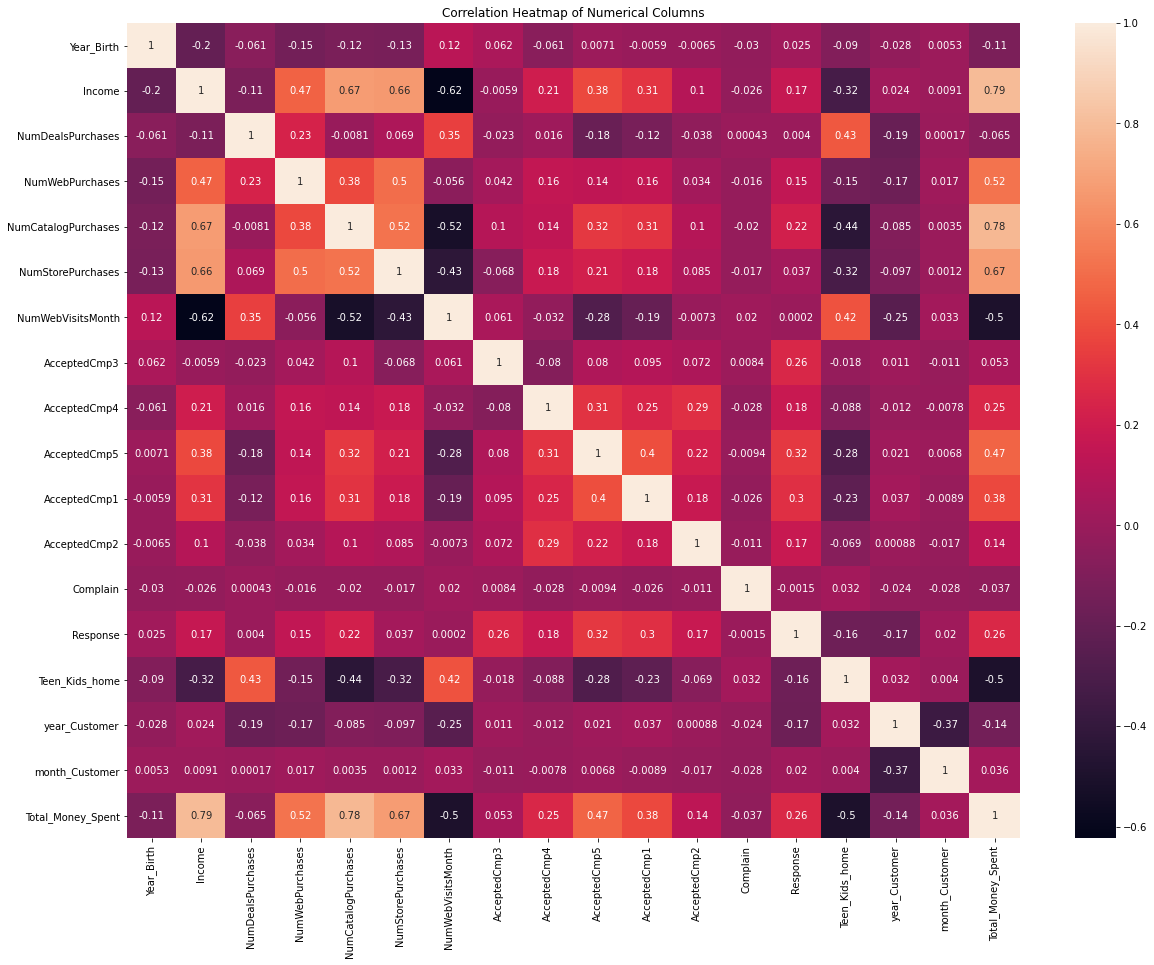

In [126]:
# Create a heatmap of the correlation matrix for numerical columns
plt.figure(figsize=(20, 15))
plt.title('Correlation Heatmap of Numerical Columns')
sns.heatmap(df[num_cols.drop('ID')].corr(),annot = True)
plt.show()

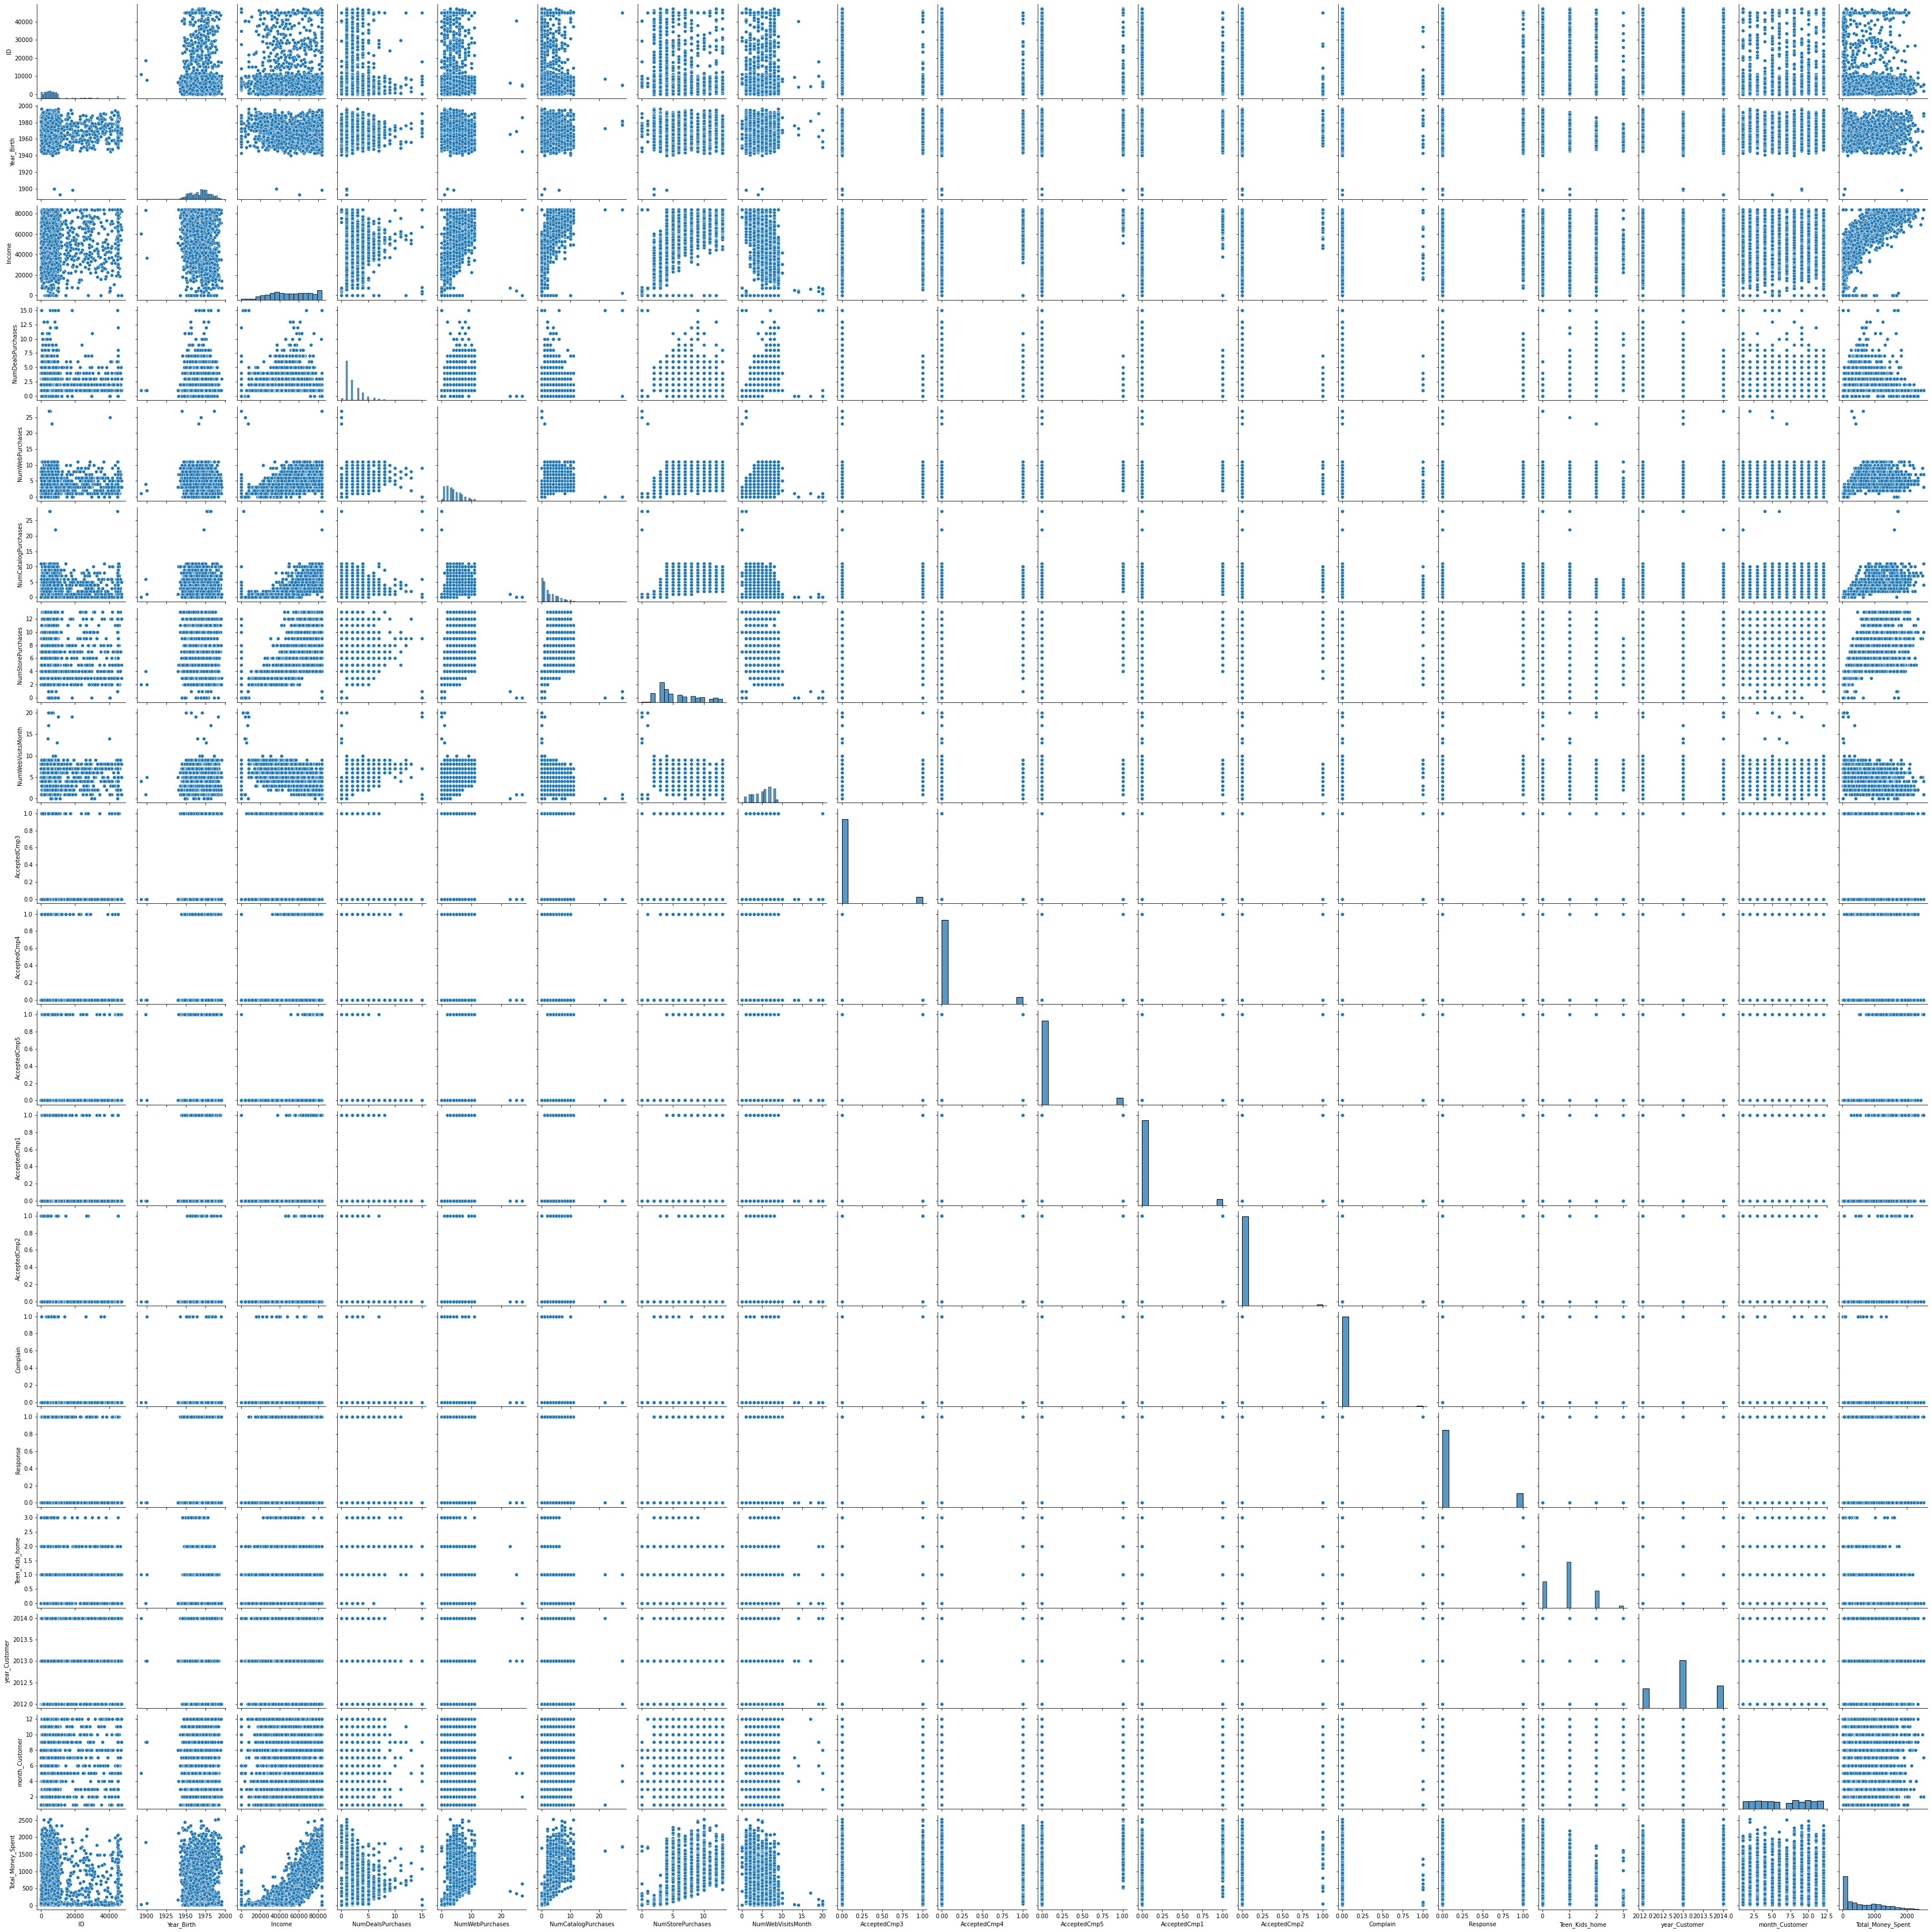

In [127]:
sns.pairplot(df)
plt.show()

## Data Preprocessing

In [128]:
## Scaling the data for clustering 
# Here we are using standard scalar.
df1=df.drop('ID',axis=1)
df1.head()

Year_Birth       Education Marital_Status   Income  NumDealsPurchases  \
0        1976  Cycle or Basic        Married   7500.0                  1   
1        1979  Cycle or Basic        Married  24594.0                  1   
2        1976  Cycle or Basic       Divorced   9548.0                  2   
3        1961  Cycle or Basic        Married  28249.0                  1   
4        1978  Cycle or Basic        Married  24882.0                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                2                    0                  3                  8   
1                1                    0                  3                  5   
2                1                    0                  3                  8   
3                2                    0                  3                  6   
4                1                    1                  2                  6   

   AcceptedCmp3  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0  ...             0             0             0         0   
1             0  ...             0             0             0         0   
2             0  ...             0             0             0         0   
3             0  ...             0             0             0         0   
4             1  ...             0             0             0         0   

   Response  Teen_Kids_home  year_Customer  month_Customer  Recency_binned  \
0       0.0               0           2012              11               2   
1       0.0               1           2013              10               3   
2       0.0               1           2012               8               2   
3       0.0               0           2014               6               3   
4       0.0               1           2012               9               2   

  Total_Money_Spent  
0                61  
1                29  
2                29  
3                43  
4                80  

[5 rows x 21 columns]

In [129]:
df1.dtypes

Year_Birth                int64
Education                object
Marital_Status           object
Income                  float64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Response                float64
Teen_Kids_home            int64
year_Customer             int64
month_Customer            int64
Recency_binned         category
Total_Money_Spent         int64
dtype: object

In [130]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df1[['Income','Total_Money_Spent']]=scaler.fit_transform(df1[['Income','Total_Money_Spent']])

In [131]:
df1.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Teen_Kids_home', 'year_Customer',
       'month_Customer', 'Recency_binned', 'Total_Money_Spent'],
      dtype='object')

In [132]:
df1['Education'].value_counts()

Graduation        1126
PhD                485
Master             370
Cycle or Basic     257
Name: Education, dtype: int64

In [133]:
dummy = pd.get_dummies(df1['Education'])
dummy = dummy.drop(['Cycle or Basic'], axis=1)
df1 = pd.concat([df1, dummy], axis = 1)


In [134]:
df1['Marital_Status'].value_counts()

Married     1443
Single       480
Divorced     232
Widow         76
Others         7
Name: Marital_Status, dtype: int64

In [135]:
dummy = pd.get_dummies(df1['Marital_Status'])
dummy = dummy.drop(['Others'], axis=1)
df1= pd.concat([df1, dummy], axis = 1)


In [136]:
df1.head()

Year_Birth       Education Marital_Status    Income  NumDealsPurchases  \
0        1976  Cycle or Basic        Married -2.084138                  1   
1        1979  Cycle or Basic        Married -1.263199                  1   
2        1976  Cycle or Basic       Divorced -1.985783                  2   
3        1961  Cycle or Basic        Married -1.087667                  1   
4        1978  Cycle or Basic        Married -1.249368                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                2                    0                  3                  8   
1                1                    0                  3                  5   
2                1                    0                  3                  8   
3                2                    0                  3                  6   
4                1                    1                  2                  6   

   AcceptedCmp3  ...  month_Customer  Recency_binned  Total_Money_Spent  \
0             0  ...              11               2          -0.904732   
1             0  ...              10               3          -0.957874   
2             0  ...               8               2          -0.957874   
3             0  ...               6               3          -0.934625   
4             1  ...               9               2          -0.873179   

   Graduation  Master  PhD  Divorced  Married  Single Widow  
0           0       0    0         0        1       0     0  
1           0       0    0         0        1       0     0  
2           0       0    0         1        0       0     0  
3           0       0    0         0        1       0     0  
4           0       0    0         0        1       0     0  

[5 rows x 28 columns]

In [137]:
df1.drop(['Education','Marital_Status'],axis=1, inplace= True)

In [138]:
df1.columns

Index(['Year_Birth', 'Income', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Teen_Kids_home',
       'year_Customer', 'month_Customer', 'Recency_binned',
       'Total_Money_Spent', 'Graduation', 'Master', 'PhD', 'Divorced',
       'Married', 'Single', 'Widow'],
      dtype='object')

#### Hopkins test

In [139]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [140]:
hopkins(df.drop(['ID','Education','Marital_Status'],axis=1))

0.9022909863547357

**Dataset look good for Clustering As per Hopkins Test**

In [141]:
df1.isnull().sum()

Year_Birth             0
Income                 0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Teen_Kids_home         0
year_Customer          0
month_Customer         0
Recency_binned         0
Total_Money_Spent      0
Graduation             0
Master                 0
PhD                    0
Divorced               0
Married                0
Single                 0
Widow                  0
dtype: int64

**The data looks good for the clustering.**



## Model Building

### KMeans clustering

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

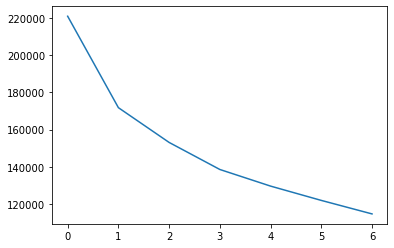

In [146]:
# Finding Optimal number of clusters.
# Elbow Curve

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(df1)
    ssd.append( kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

**Here we can see the elbow curve on the values 2, 3 and 4.**



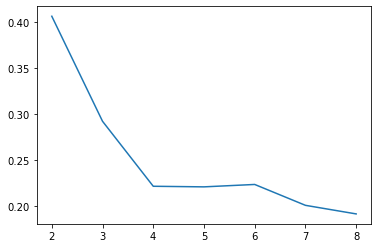

In [148]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(df1)
    ssd.append([num_clusters, silhouette_score(df1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

**since we are getting very strange results we will be using silhoutte score to determine the optimal number of k.**

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

 ### Using silhoutte score to determine the optimal number of k.

In [150]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4065117644076677
For n_clusters=3, the silhouette score is 0.292079933443513
For n_clusters=4, the silhouette score is 0.2212740272599907
For n_clusters=5, the silhouette score is 0.2205547365281421
For n_clusters=6, the silhouette score is 0.20915127492656896
For n_clusters=7, the silhouette score is 0.20637888618462877
For n_clusters=8, the silhouette score is 0.18679449936521747


**Optimal number of k is 4. #according to the silhoutte score and elbow curve.**

#### Optimal Number of K=4

In [151]:
### Initialising kmeans
kmeans = KMeans(n_clusters=4, max_iter=100 , random_state = 100)
kmeans.fit(df1)

KMeans(max_iter=100, n_clusters=4, random_state=100)

In [152]:
kmeans.labels_

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [154]:
# assign the label to data frame
df['cluster_id'] = kmeans.labels_
df.head()

ID  Year_Birth       Education Marital_Status   Income  \
0   387        1976  Cycle or Basic        Married   7500.0   
1  8373        1979  Cycle or Basic        Married  24594.0   
2  5342        1976  Cycle or Basic       Divorced   9548.0   
3  2563        1961  Cycle or Basic        Married  28249.0   
4  9733        1978  Cycle or Basic        Married  24882.0   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                2                    0                  3   
1                  1                1                    0                  3   
2                  2                1                    0                  3   
3                  1                2                    0                  3   
4                  1                1                    1                  2   

   NumWebVisitsMonth  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0                  8  ...             0             0         0       0.0   
1                  5  ...             0             0         0       0.0   
2                  8  ...             0             0         0       0.0   
3                  6  ...             0             0         0       0.0   
4                  6  ...             0             0         0       0.0   

   Teen_Kids_home  year_Customer  month_Customer  Recency_binned  \
0               0           2012              11               2   
1               1           2013              10               3   
2               1           2012               8               2   
3               0           2014               6               3   
4               1           2012               9               2   

   Total_Money_Spent  cluster_id  
0                 61           1  
1                 29           1  
2                 29           1  
3                 43           3  
4                 80           1  

[5 rows x 23 columns]

In [155]:
df['cluster_id'].value_counts()

1    768
3    546
0    519
2    405
Name: cluster_id, dtype: int64

### Visualizing the clusters.

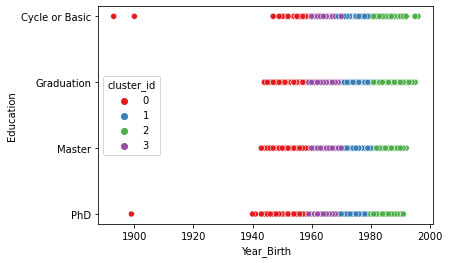

In [157]:
sns.scatterplot(x = 'Year_Birth', y = 'Education', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

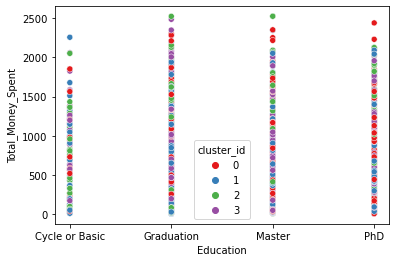

In [160]:
sns.scatterplot(x = 'Education', y = 'Total_Money_Spent', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

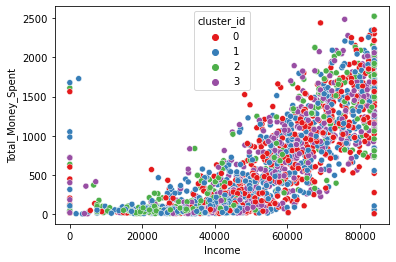

In [161]:
sns.scatterplot(x = 'Income', y = 'Total_Money_Spent', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

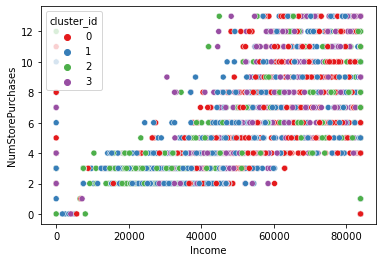

In [165]:
sns.scatterplot(x = 'Income', y = 'NumStorePurchases', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

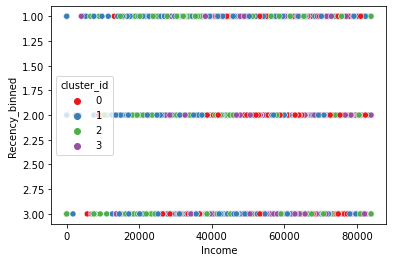

In [167]:
sns.scatterplot(x = 'Income', y = 'Recency_binned', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

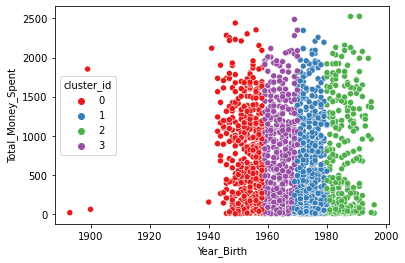

In [168]:
sns.scatterplot(x = 'Year_Birth', y = 'Total_Money_Spent', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

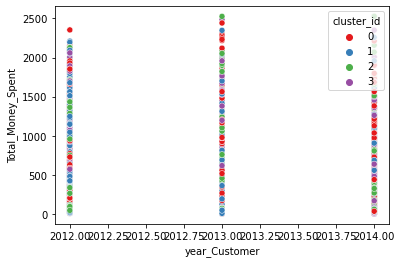

In [169]:
sns.scatterplot(x = 'year_Customer', y = 'Total_Money_Spent', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

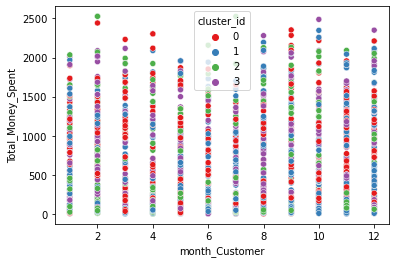

In [170]:
sns.scatterplot(x = 'month_Customer', y = 'Total_Money_Spent', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

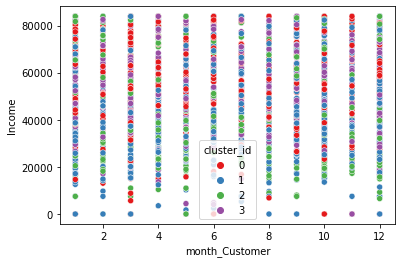

In [171]:
sns.scatterplot(x = 'month_Customer', y = 'Income', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

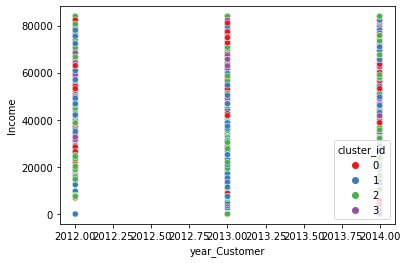

In [172]:
sns.scatterplot(x = 'year_Customer', y = 'Income', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

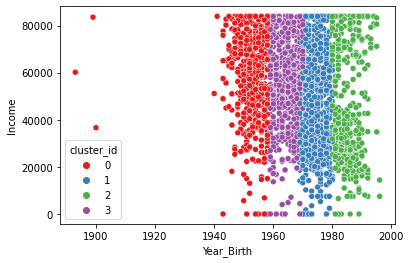

In [173]:
sns.scatterplot(x = 'Year_Birth', y = 'Income', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

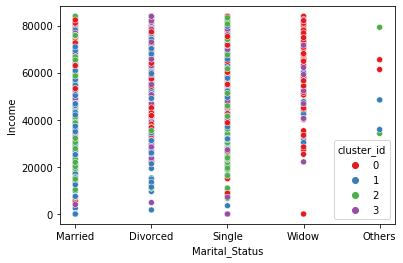

In [174]:
sns.scatterplot(x = 'Marital_Status', y = 'Income', hue ='cluster_id', legend = 'full', data = df, palette='Set1')
plt.show()

### KMeans cluster visualizations


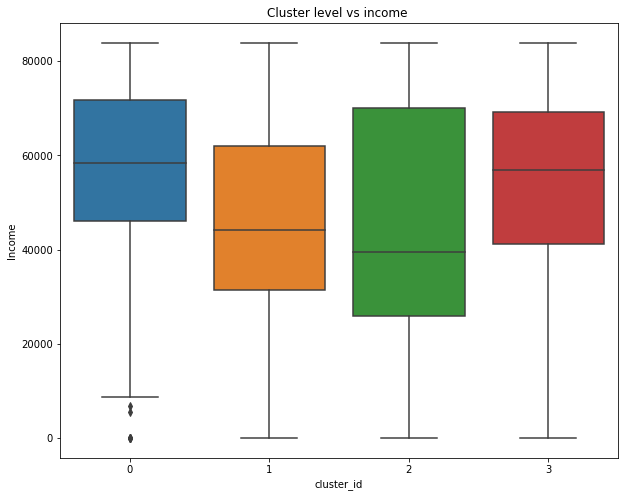

In [176]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_id',y='Income')
plt.title('Cluster level vs income ')
plt.show()

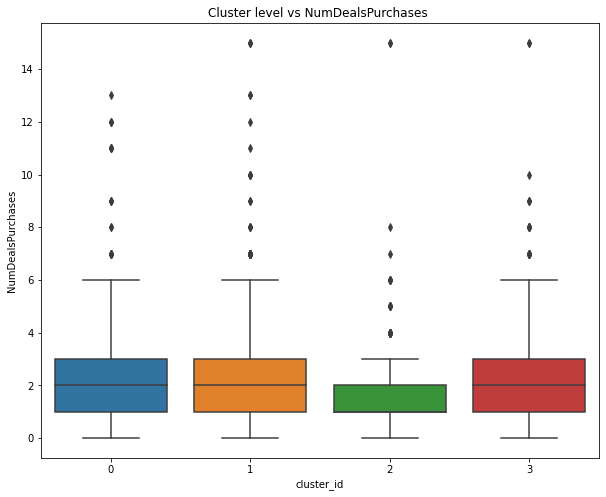

In [196]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_id',y='NumDealsPurchases')
plt.title('Cluster level vs NumDealsPurchases ')
plt.show()

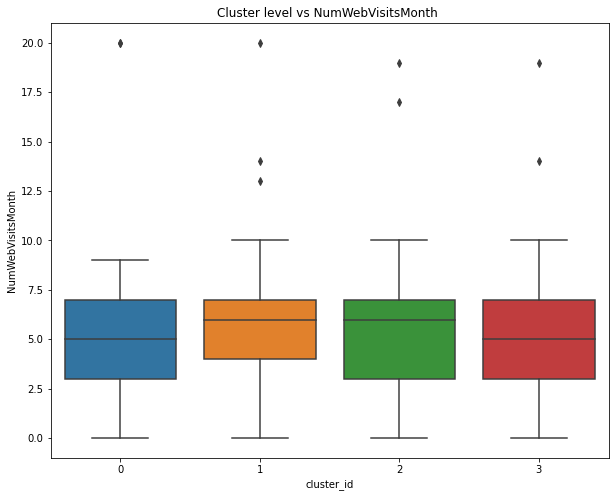

In [197]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_id',y='NumWebVisitsMonth')
plt.title('Cluster level vs NumWebVisitsMonth ')
plt.show()

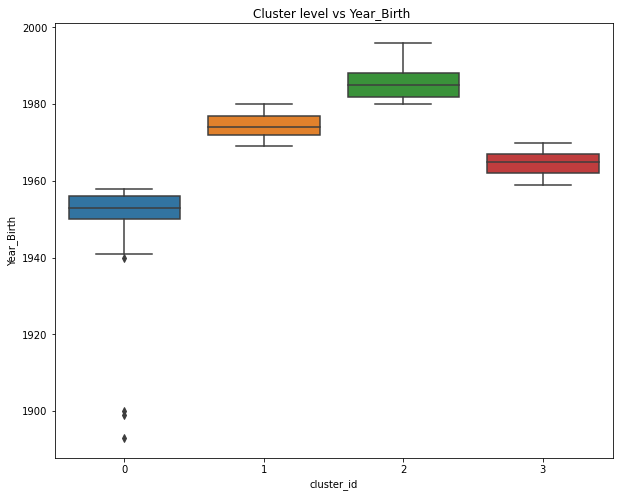

In [198]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_id',y='Year_Birth')
plt.title('Cluster level vs Year_Birth ')
plt.show()

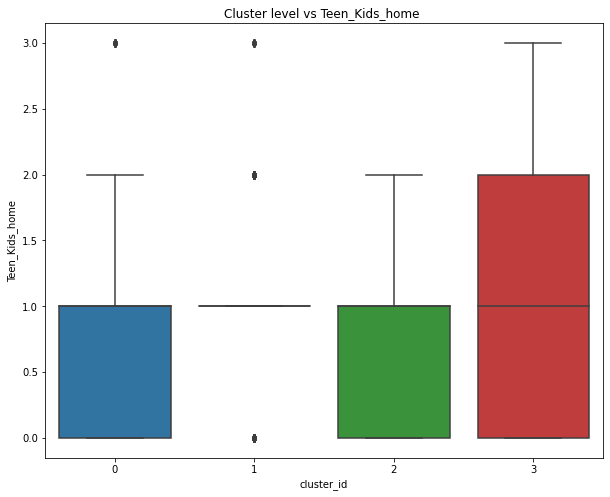

In [199]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_id',y='Teen_Kids_home')
plt.title('Cluster level vs Teen_Kids_home ')
plt.show()

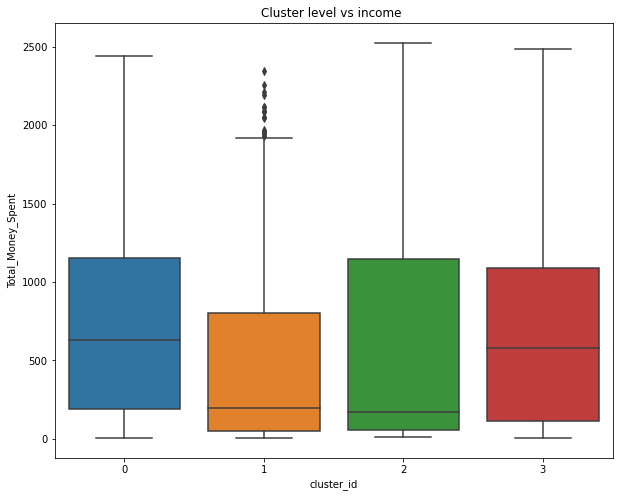

In [193]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_id',y='Total_Money_Spent')
plt.title('Cluster level vs income ')
plt.show()

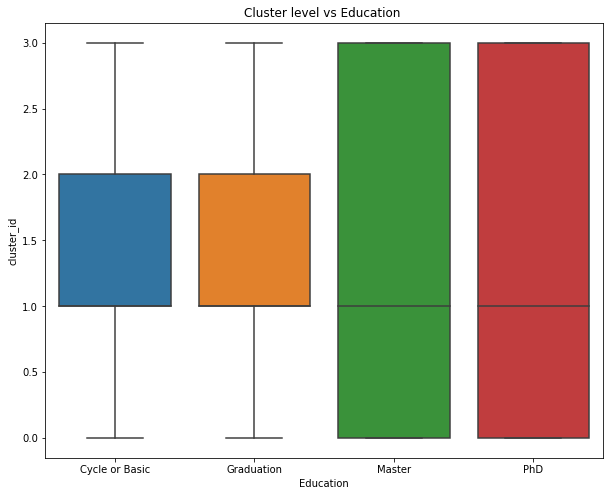

In [200]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'Education',y='cluster_id')
plt.title('Cluster level vs Education ')
plt.show()

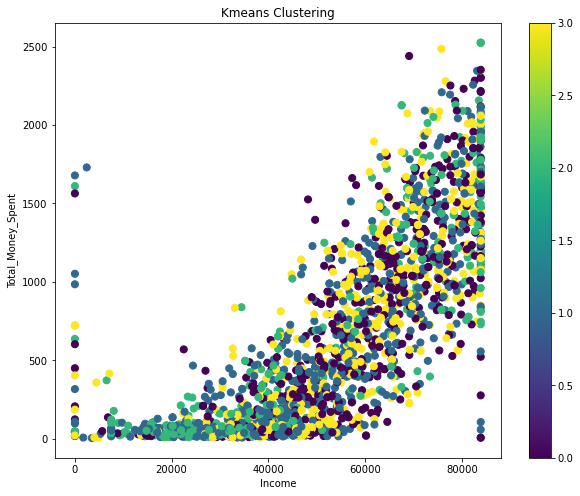

In [254]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Income'], df['Total_Money_Spent'], c=df['cluster_id'], cmap='viridis', s=50)
plt.xlabel('Income')
plt.ylabel('Total_Money_Spent')
plt.title('Kmeans Clustering')
plt.colorbar()
plt.show()

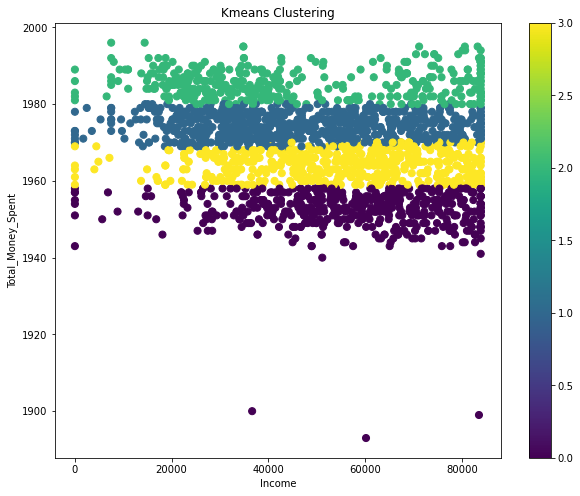

In [256]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Income'], df['Year_Birth'], c=df['cluster_id'], cmap='viridis', s=50)
plt.xlabel('Income')
plt.ylabel('Total_Money_Spent')
plt.title('Kmeans Clustering')
plt.colorbar()
plt.show()

**Insights:-**
- **As we can see Year_Birth vs cluster_id tells us how clusters are differenciated to one another**
- **Income and Total_Money_Spent vs cluster_id we can say that cluster are differenciate**

## Heirarchal Clustering

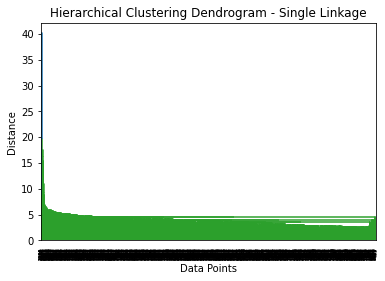

In [210]:
# Forming clusters with the help of Hierarchical Clustering using single linkage
mergings_single = linkage(df1, method="single", metric='euclidean')

# Plotting the Dendrogram
plt.figure(figsize=(12, 8))
%matplotlib inline
dendrogram(mergings_single)  
plt.title('Hierarchical Clustering Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

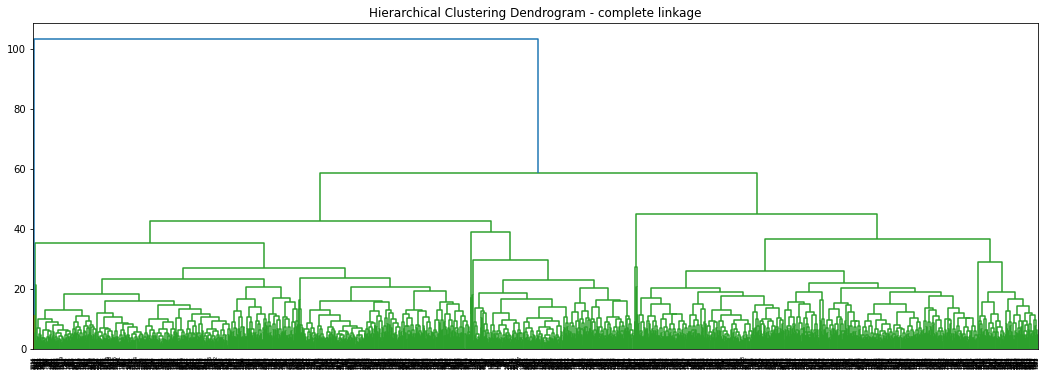

In [212]:
# Forming clusters with the help of Heirarichal Clustering using complete linkage.
mergings_complete = linkage(df1, method="complete", metric='euclidean')
%matplotlib inline
plt.figure(figsize=(18,6))
dendrogram(mergings_complete)
plt.title('Hierarchical Clustering Dendrogram - complete linkage')
plt.show()

#### Complete linkage is better than Single linkage. So we will go with complete linkage.


In [236]:
### Looking at this we can say that there are 5 clusters forming with heirarichal clustering.
# cutting dendrogram with '3' clusters
cluster_labels = cut_tree(mergings_complete, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 2, 0, 0])

In [237]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head(10)

ID  Year_Birth       Education Marital_Status   Income  \
0   387        1976  Cycle or Basic        Married   7500.0   
1  8373        1979  Cycle or Basic        Married  24594.0   
2  5342        1976  Cycle or Basic       Divorced   9548.0   
3  2563        1961  Cycle or Basic        Married  28249.0   
4  9733        1978  Cycle or Basic        Married  24882.0   
5  4669        1981  Cycle or Basic        Married  24480.0   
6  8234        1973  Cycle or Basic        Married  27190.0   
7  8151        1990  Cycle or Basic        Married  24279.0   
8  2457        1975  Cycle or Basic        Married  30801.0   
9  6682        1973  Cycle or Basic        Married  18978.0   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                2                    0                  3   
1                  1                1                    0                  3   
2                  2                1                    0                  3   
3                  1                2                    0                  3   
4                  1                1                    1                  2   
5                  3                3                    0                  4   
6                  1                1                    0                  2   
7                  1                4                    1                  3   
8                  2                1                    0                  3   
9                  1                1                    0                  3   

   NumWebVisitsMonth  ...  AcceptedCmp2  Complain  Response  Teen_Kids_home  \
0                  8  ...             0         0       0.0               0   
1                  5  ...             0         0       0.0               1   
2                  8  ...             0         0       0.0               1   
3                  6  ...             0         0       0.0               0   
4                  6  ...             0         0       0.0               1   
5                  7  ...             0         0       0.0               1   
6                  8  ...             0         0       1.0               1   
7                  8  ...             0         0       0.0               0   
8                  7  ...             0         0       0.0               1   
9                  8  ...             0         0       0.0               1   

   year_Customer  month_Customer  Recency_binned  Total_Money_Spent  \
0           2012              11               2                 61   
1           2013              10               3                 29   
2           2012               8               2                 29   
3           2014               6               3                 43   
4           2012               9               2                 80   
5           2013              11               2                102   
6           2013               8               1                 18   
7           2012              12               1                263   
8           2012              10               1                 45   
9           2012              11               2                 37   

   cluster_id  cluster_labels  
0           1               0  
1           1               0  
2           1               0  
3           3               1  
4           1               0  
5           2               0  
6           1               0  
7           2               2  
8           1               0  
9           1               0  

[10 rows x 24 columns]

In [238]:
df['cluster_labels'].value_counts()

0    971
1    891
2    366
3      7
4      3
Name: cluster_labels, dtype: int64

#### Visualizing the clusters.

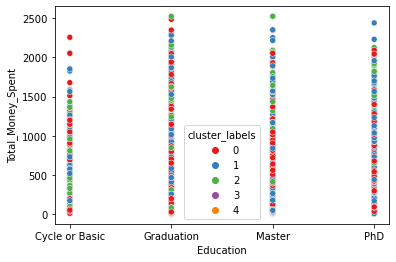

In [239]:
sns.scatterplot(x = 'Education', y = 'Total_Money_Spent', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

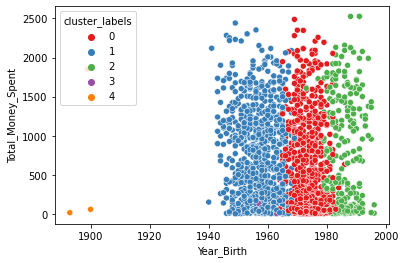

In [240]:
sns.scatterplot(x = 'Year_Birth', y = 'Total_Money_Spent', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

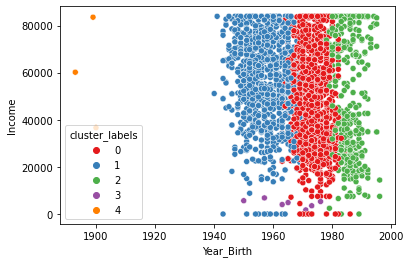

In [241]:
sns.scatterplot(x = 'Year_Birth', y = 'Income', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

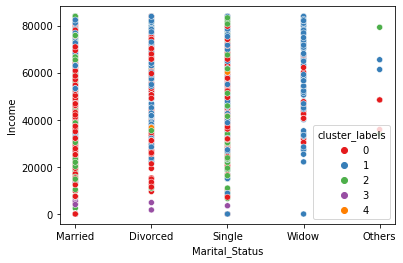

In [242]:
sns.scatterplot(x = 'Marital_Status', y = 'Income', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

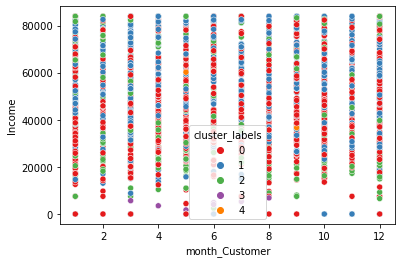

In [243]:
sns.scatterplot(x = 'month_Customer', y = 'Income', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

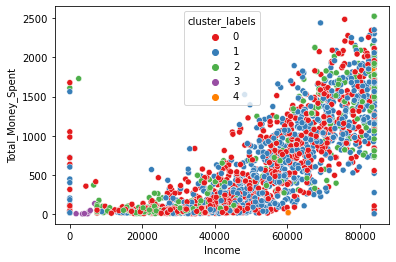

In [244]:
sns.scatterplot(x = 'Income', y = 'Total_Money_Spent', hue ='cluster_labels', legend = 'full', data = df, palette='Set1')
plt.show()

### Heirarchal cluster visualizations


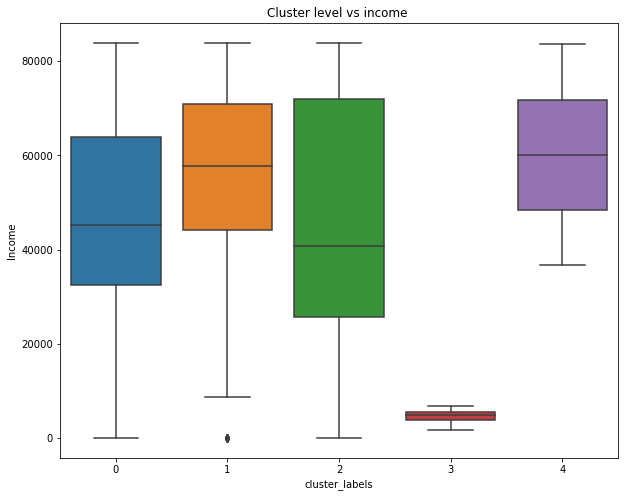

In [245]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_labels',y='Income')
plt.title('Cluster level vs income ')
plt.show()

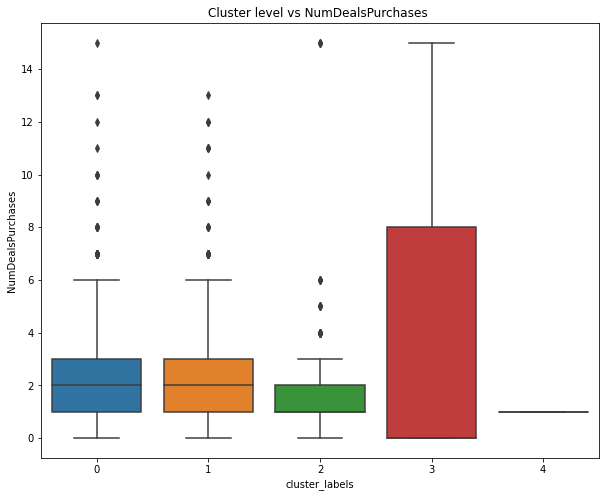

In [246]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_labels',y='NumDealsPurchases')
plt.title('Cluster level vs NumDealsPurchases ')
plt.show()

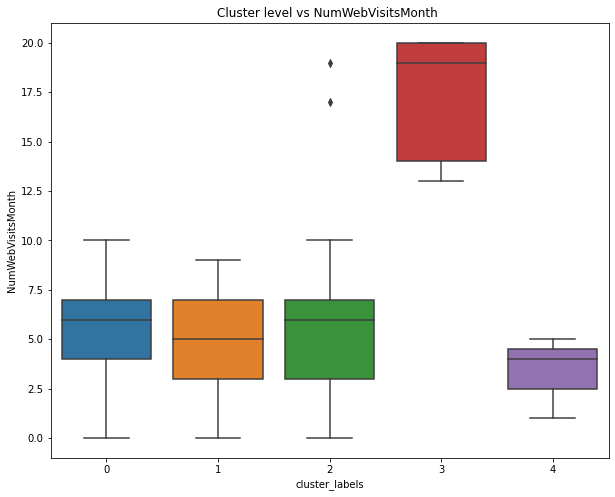

In [247]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_labels',y='NumWebVisitsMonth')
plt.title('Cluster level vs NumWebVisitsMonth ')
plt.show()

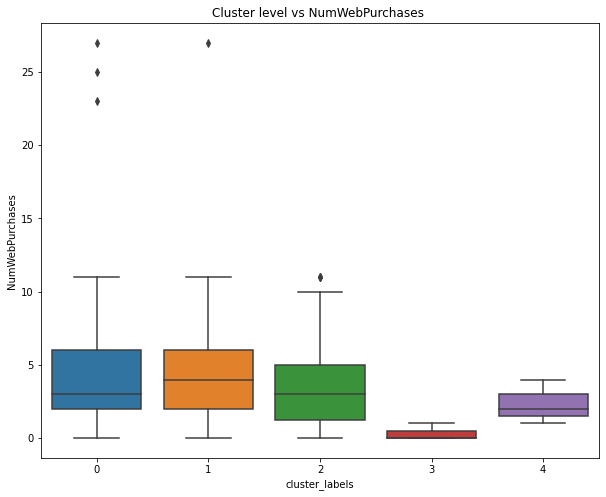

In [248]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_labels',y='NumWebPurchases')
plt.title('Cluster level vs NumWebPurchases ')
plt.show()

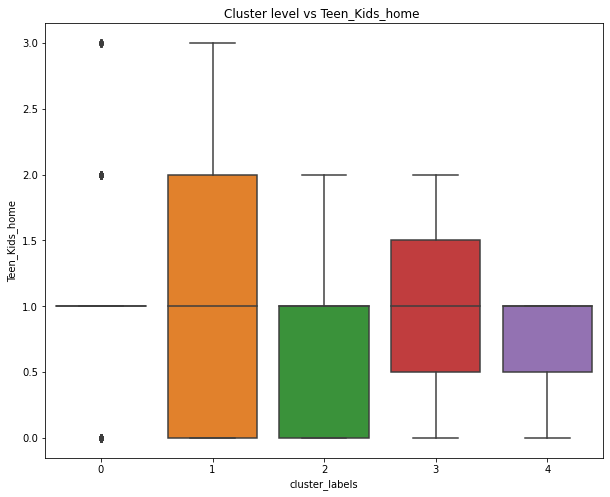

In [249]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_labels',y='Teen_Kids_home')
plt.title('Cluster level vs Teen_Kids_home ')
plt.show()

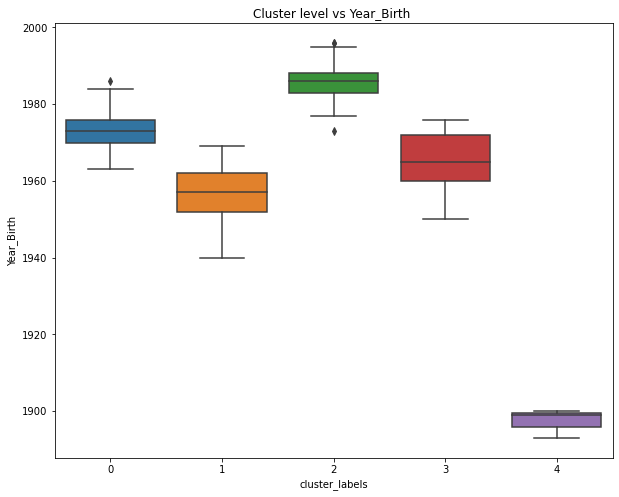

In [250]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_labels',y='Year_Birth')
plt.title('Cluster level vs Year_Birth ')
plt.show()

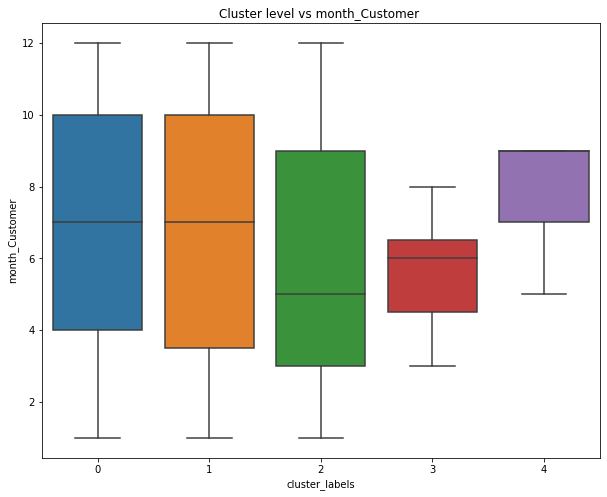

In [251]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x = 'cluster_labels',y='month_Customer')
plt.title('Cluster level vs month_Customer ')
plt.show()

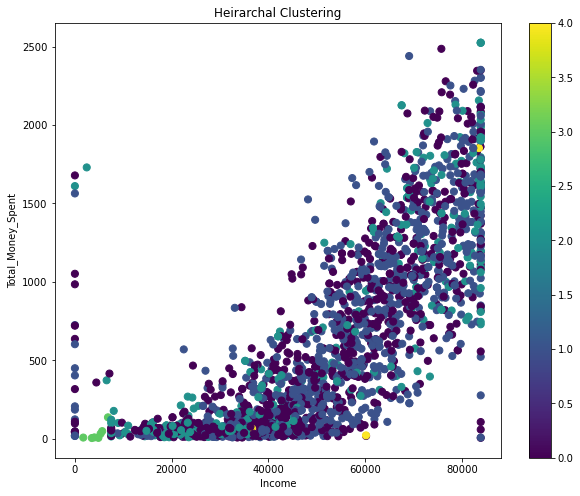

In [253]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Income'], df['Total_Money_Spent'], c=df['cluster_labels'], cmap='viridis', s=50)
plt.xlabel('Income')
plt.ylabel('Total_Money_Spent')
plt.title('Heirarchal Clustering')
plt.colorbar()
plt.show()

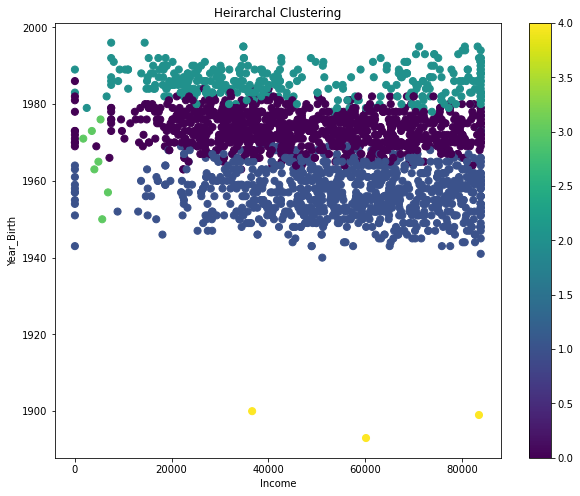

In [257]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Income'], df['Year_Birth'], c=df['cluster_labels'], cmap='viridis', s=50)
plt.xlabel('Income')
plt.ylabel('Year_Birth')
plt.title('Heirarchal Clustering')
plt.colorbar()
plt.show()

**Insights:-**
- **Both clustering Algorithms givings pretty much results when we visualise them**
- **We choose clusters 5 for Heirarchal clustering and in that we can differenciate clusters**
